# West Nile Virus Analysis & Prediction

# Part 1

## Executive Summary

In 2022, Chicago reported one human case of West Nile virus (WNV) towards the end of the summer and early fall season. This is remarkable compared to the previous 13 reported cases in the previous year, and even more in the years before. 

WNV is the leading cause of mosquito-borne disease in the US, and it is spread to people by the bite of an infected mosquito, specifically a Culex pipiens mosquito. One in five infected people with WNV would experience fever, nausea, headache and muscle aches lasting from a few days to a few weeks - while the remaining four out of five would not exhibit any symptoms. However the virus remains a major concern as individuals with weaker immune systems and those above 60 are at higher risk for severe illness from WNV. 

Every year the Chicago Department of Public Health (CDPH) runs a comprehensive surveillance program in suburban areas to trap mosquitoes and test them for WNV. This data has helped CDPH target high-risk areas for the virus and significantly reduce the number of positive cases in the last few years. ([source](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_communities/news/2022/september/first-human-case-of-west-nile-virus-detected-in-chicago-in-2022.html))

However the CDPH recognized that the last few years of data have major anomalies due to the COVID-19 pandemic and low infection count, hence we may not be able to use recent data to create an action plan for 2023. Our team at the Disease and Treatment Agency was tasked to analyze the years with more severe WNV outbreak and devise a plan to minimize the spread of the WNV. Through the historical data from the WNV surveillance reports coupled with weather information and pesticide usage,
1. We used machine learning models to predict when and where the mosquitoes will test positive for WNV.
2. The best model allowed us to predict WNV outbreaks as accurately as possible so that we can effectively allocate resources to curb the virus transmission.


*Content:*

1. [Executive Summary](#Executive-Summary)
2. [Datasets & Methodology](#Datasets-&-Methodology)
3. [Data Cleaning](#Data-Cleaning)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
5. [Feature Engineering](#Feature-Engineering)

*Links to next notebooks:*
- Part 2: Modeling & Tuning
- Part 3: Conclusion & Recommendations

## Datasets & Methodology

### About the datasets

- [`train.csv`](../assets/train.csv): This is the main dataset we'll be working with, which contains 10,506 observations on the presence of West Nile Virus across neighborhood clusters in Chicago, Illinois. This dataset is taken from the years 2007, 2009, 2011 and 2013. There are a total of 11 variables involved in tracking the West Nile Virus in the neighborhoods.
- [`test.csv`](../assets/test.csv): There's a total of 11 features and 116,293 observations for the years 2008, 2010, 2012 and 2014. The presence of West Nile Virus is missing from this set, which we will use our model to predict. 
- [`spray.csv`](../assets/spray.csv): This dataset contains 14,835 geographic information system (GIS) data on the city's spraying efforts in 2011 and 2013 - including the date, time, latitude and longitude.
-  [`weather.csv`](../assets/weather.csv): This dataset contains weather information from 2007 to 2014 - covering 2,944 observations across 22 relevant weather-related variables. 
- [`mapdata_copyright_openstreetmap_contributors.txt`](../assets/mapdata_copyright_openstreetmap_contributors.txt): Map files from Open Streetmap and used for visualizations in the analysis. 

### Data dictionary

| **Feature**            	| **Type** 	| **Dataset**              	| **Description**                                                                         	|
|------------------------	|----------	|--------------------------	|-----------------------------------------------------------------------------------------	|
| Id                     	| int      	| `train.csv` & `test.csv` 	| ID number of the record                                                                 	|
| Date                   	| object   	| `train.csv` & `test.csv` 	| Refers to the date the West Nile Virus test is performed                                	|
| Address                	| object   	| `train.csv` & `test.csv` 	| The approximate address of the location of trap; sent to GeoCoder                       	|
| Species                	| object   	| `train.csv` & `test.csv` 	| The mosquito species in trap                                                            	|
| Block                  	| int      	| `train.csv` & `test.csv` 	| Refers to block number of address                                                       	|
| Street                 	| object   	| `train.csv` & `test.csv` 	| Refers to street of address                                                             	|
| Trap                   	| object   	| `train.csv` & `test.csv` 	| ID number of the trap                                                                   	|
| AddressNumberAndStreet 	| object   	| `train.csv` & `test.csv` 	| The approximate address retrieved from GeoCoder                                         	|
| Latitude               	| float    	| `train.csv` & `test.csv` 	| The latitude retrieved from GeoCoder                                                    	|
| Longitude              	| float    	| `train.csv` & `test.csv` 	| The longitude retrieved from GeoCoder                                                   	|
| AddressAccuracy        	| int      	| `train.csv` & `test.csv` 	| The accuracy of information returned from GeoCoder                                      	|
| NumMosquitos           	| int      	| `train.csv` & `test.csv` 	| The number of mosquitoes in the trap                                                    	|
| WnvPresent             	| int      	| `train.csv` & `test.csv` 	| Whether or not West Nile Virus is present in these mosquitoes (1 = present; 0 = absent) 	|
| Date                   	| object   	| `spray.csv`              	| The date of spray                                                                       	|
| Time                   	| object   	| `spray.csv`              	| The time of spray                                                                       	|
| Latitude               	| float    	| `spray.csv`              	| Latitude of spray                                                                       	|
| Longitude              	| float    	| `spray.csv`              	| Longitude of spray                                                                      	|
| Station                	| int      	| `weather.csv`            	| Refers to the weather station (1 or 2)                                                  	|
| Date                   	| object   	| `weather.csv`            	| Refers to the date of measurement                                                       	|
| Tmax                   	| int      	| `weather.csv`            	| Maximum daily temperature (Degrees Fahrenheit)                                          	|
| Tmin                   	| int      	| `weather.csv`            	| Minimum daily temperature (Degrees Fahrenheit)                                          	|
| Tavg                   	| object   	| `weather.csv`            	| Average daily temperature (Degrees Fahrenheit)                                          	|
| Depart                 	| object   	| `weather.csv`            	| Departure from normal temperature (Degrees Fahrenheit)                                  	|
| Dewpoint               	| int      	| `weather.csv`            	| Average dew point (Degrees Fahrenheit)                                                  	|
| WetBulb                	| object   	| `weather.csv`            	| Average wet bulb (Degrees Fahrenheit)                                                   	|
| Heat                   	| object   	| `weather.csv`            	| Heating degree days                                                                     	|
| Cool                   	| object   	| `weather.csv`            	| Cooling degree days                                                                     	|
| Sunrise                	| object   	| `weather.csv`            	| Time of sunrise (calculated, not observed)                                              	|
| Sunset                 	| object   	| `weather.csv`            	| Time of sunset (calculated, not observed)                                               	|
| CodeSum                	| object   	| `weather.csv`            	| Code of weather phenomena                                                               	|
| Depth                  	| object   	| `weather.csv`            	| Depth of snow on the ground (M = Missing data)                                          	|
| Water1                 	| object   	| `weather.csv`            	| Water equivalent (M = Missing data)                                                     	|
| SnowFall               	| object   	| `weather.csv`            	| Snowfall (inch) (M = Missing data, T= Trace)                                            	|
| PrecipTotal            	| object   	| `weather.csv`            	| Total daily rainfall (inch)                                                             	|
| StnPressure            	| object   	| `weather.csv`            	| Average atmospheric pressure (inch Hg)                                                  	|
| SeaLevel               	| object   	| `weather.csv`            	| Average sea level pressure (inch Hg)                                                    	|
| ResultSpeed            	| float    	| `weather.csv`            	| Resultant wind speed (mph)                                                              	|
| ResultDir              	| int      	| `weather.csv`            	| Resultant wind direction (Degrees)                                                      	|
| AvgSpeed               	| object   	| `weather.csv`            	| Average wind speed (mph)                                                                	|

### Additional References

1. [First Human Case of West Nile Virus Detected in Chicago in 2022](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_communities/news/2022/september/first-human-case-of-west-nile-virus-detected-in-chicago-in-2022.html)
- We referred to this news article on the most recent WNV report in 2022, along with summary of cases in 2021 and the virus. 
- The article helped us better understand context of WNV in Chicago and snippets from the article was included in the executive summary above.

2. [The drivers of West Nile virus human illness in the Chicago, Illinois, USA area](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7241786/)
- We referred to this study to better understand how to assess factors influencing the WNV spread in Chicago.

3. [Mosquito Surveillance Software](https://www.cdc.gov/westnile/resourcepages/mosqSurvSoft.html)
- We referred to this CDC guide on calculating virus infection rate, and attempted to include the calculation in the EDA process.

4. [Economic Cost Analysis of West Nile Virus Outbreak, Sacramento County, California, USA, 2005](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3322011/)
- We referred to this study for an indication of economic costs involved in managing WNV outbreak.
- The values from this study were used in the cost-benefit analysis section of our project.

### Methodology

For this project, we've conducted a thorough analysis and modeling through these steps:
1. **Data Cleaning**: We assessed the training dataset for any outliers and removed them immediately. We also checked for missing values where we've filled them or removed them if irrelevant.
2. **Exploratory Data Analysis**: We visualized the dataset through a series of graphs and plots to better understand the relationships between variables as well as its individual impact the spread of the West Nile Virus.
3. **Feature Engineering & Data Preprocessing**: After evaluating specific variables, we removed variables that didn't have much impact and combined variables that were relevant to each other.
4. **Data Modeling & Evaluation**: Based on the selected features, we modeled them through these classification models - **XXX**. The best model will then be used to predict the presence of West Nile Virus in the test dataset. 
5. **Cost-Benefit Analysis**: Following the best model selected, we also conducted a cost-benefit analysis on annual cost of pesticide coverage and its benefits - particularly for areas that are at higher risk.

We've also uploaded the predicted West Nile Virus presence on [Kaggle](https://www.kaggle.com/competitions/predict-west-nile-virus/data) to measure the accuracy of our finalized model.

## Data Cleaning

### Libraries

In [1496]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math
from datetime import datetime, time

from sklearn.impute import KNNImputer

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#change display options
pd.set_option("display.max_rows", 160)
pd.set_option("display.max_columns", 80)
sns.set_theme(style="ticks", palette="flare")

### Load datasets

In [1497]:
df_train = pd.read_csv('../assets/train.csv')
df_spray = pd.read_csv('../assets/spray.csv')
df_weather = pd.read_csv('../assets/weather.csv')
map_data = np.loadtxt('../assets/mapdata_copyright_openstreetmap_contributors.txt')
df_test = pd.read_csv('../assets/test.csv')

### Dataset: `train.csv`

In [1498]:
df_train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [1499]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [1500]:
df_train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [1501]:
# converting Date in train dataset to python readable date-time format
df_train['Date'] = pd.to_datetime(df_train['Date'])

In [1502]:
# Date range:
print(f'From:{df_train["Date"].min()}')
print(f"To:{df_train['Date'].max()}")

From:2007-05-29 00:00:00
To:2013-09-26 00:00:00


In [1503]:
# extract the date features
df_train['Year'] = df_train['Date'].apply(lambda x: x.year)
df_train['Month'] = df_train['Date'].apply(lambda x: x.month)
df_train['Week'] = df_train['Date'].apply(lambda x: x.week)
df_train['DayOfWeek'] = df_train['Date'].apply(lambda x: x.dayofweek)

### Dataset: `spray.csv`

The City of Chicago also does spraying to kill mosquitos. You are given the GIS data for their spray efforts in 2011 and 2013. Spraying can reduce the number of mosquitos in the area, and therefore might eliminate the appearance of West Nile virus. 

In [1504]:
df_spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [1505]:
df_spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [1506]:
df_spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [1507]:
df_spray.head(10)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858
5,2011-08-29,6:57:48 PM,42.390395,-88.088315
6,2011-08-29,6:57:58 PM,42.390673,-88.088002
7,2011-08-29,6:58:08 PM,42.391027,-88.088002
8,2011-08-29,6:58:18 PM,42.391403,-88.088003
9,2011-08-29,6:58:28 PM,42.391718,-88.087995


In [1508]:
# Check that null values from Time column only occurs for 2011-09-07
df_spray[df_spray["Time"].isnull()].groupby("Date").Latitude.count()

Date
2011-09-07    584
Name: Latitude, dtype: int64

In [1509]:
# Mode/Median for spray timing on 2011-09-07
print(f'Mode: {pd.to_datetime(df_spray[df_spray["Date"]=="2011-09-07"]["Time"]).mode()}')
print(f'Median: {pd.to_datetime(df_spray[df_spray["Date"]=="2011-09-07"]["Time"]).median()}')
print(f'Min: {pd.to_datetime(df_spray[df_spray["Date"]=="2011-09-07"]["Time"]).min()}')
print(f'Max: {pd.to_datetime(df_spray[df_spray["Date"]=="2011-09-07"]["Time"]).max()}')

Mode: 0   2022-12-13 19:44:32
Name: Time, dtype: datetime64[ns]
Median: 2022-12-13 20:11:06
Min: 2022-12-13 19:42:12
Max: 2022-12-13 21:41:10


Text(0.5, 0, 'Time')

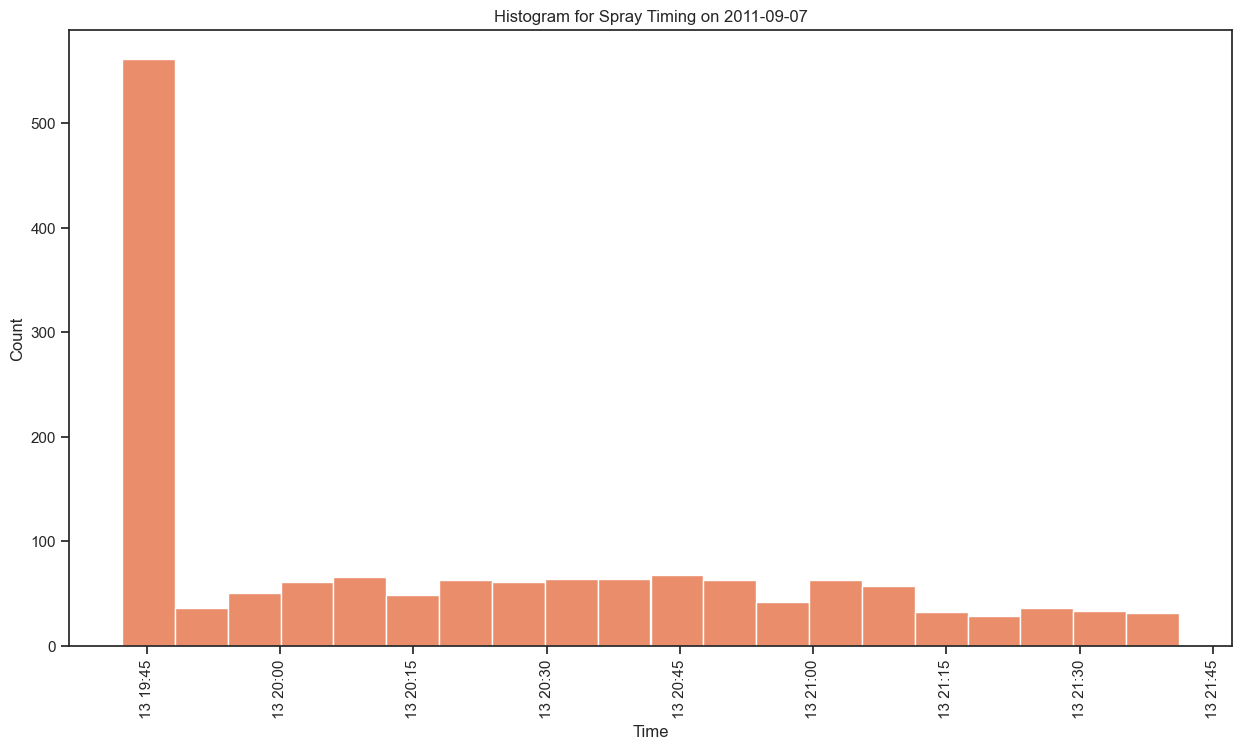

In [1510]:
# Plotting histogram of spray timing
df_spray_0907 = df_spray[df_spray["Date"]=='2011-09-07']
plt.figure(figsize =(15,8))
plt.xticks(rotation=90)
df_spray_1 = df_spray_0907[df_spray_0907["Time"].notnull()]
plt.hist(pd.to_datetime(df_spray_1['Time']),bins = 20)
plt.title("Histogram for Spray Timing on 2011-09-07")
plt.ylabel("Count")
plt.xlabel("Time")

In [1511]:
# replacing null values in df_spray "Time" column with mode timing
df_spray["Time"].fillna("7:44:32 PM", inplace = True)
df_spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14835 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [1512]:
#create datetime column:
df_spray["datetime"] = df_spray["Date"] + " " + df_spray["Time"]
df_spray.head()

,Date,Time,Latitude,Longitude,datetime
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011-08-29 6:56:58 PM
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011-08-29 6:57:08 PM
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,2011-08-29 6:57:18 PM
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,2011-08-29 6:57:28 PM
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,2011-08-29 6:57:38 PM


In [1513]:
# converting to python readable date-time format
df_spray['datetime'] = pd.to_datetime(df_spray['datetime'])

In [1514]:
# extract date components before setting it to index
df_spray['Year'] = df_spray['datetime'].apply(lambda x: x.year)
df_spray['Month'] = df_spray['datetime'].apply(lambda x: x.month)
df_spray['Week'] = df_spray['datetime'].apply(lambda x: x.week)
df_spray['DayOfWeek'] = df_spray['datetime'].apply(lambda x: x.dayofweek)

In [1515]:
# set datetime column to be the index
df_spray.set_index('datetime', inplace=True)

In [1516]:
df_spray.head()

,Date,Time,Latitude,Longitude,Year,Month,Week,DayOfWeek
datetime,,,,,,,,
2011-08-29 18:56:58,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011,8,35,0
2011-08-29 18:57:08,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011,8,35,0
2011-08-29 18:57:18,2011-08-29,6:57:18 PM,42.391022,-88.089157,2011,8,35,0
2011-08-29 18:57:28,2011-08-29,6:57:28 PM,42.390637,-88.089158,2011,8,35,0
2011-08-29 18:57:38,2011-08-29,6:57:38 PM,42.390410,-88.088858,2011,8,35,0


In [1517]:
# Date range:
print(f'From:{df_spray["Date"].min()}')
print(f"To:{df_spray['Date'].max()}")

From:2011-08-29
To:2013-09-05


### Dataset: `weather.csv`

It is believed that hot and dry conditions are more favorable for West Nile virus than cold and wet. We provide you with the dataset from NOAA of the weather conditions of 2007 to 2014, during the months of the tests. 

Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

In [1518]:
df_weather.head(50)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,M,40,50,7,0,-,-,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,0444,1852,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,M,M,42,50,M,M,-,-,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,5,38,49,5,0,0443,1853,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,M,39,50,5,0,-,-,,M,M,M,T,29.46,30.09,11.2,7,11.5


In [1519]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [1520]:
# converting Date in train dataset to python readable date-time format
df_weather['Date'] = pd.to_datetime(df_weather['Date'])

In [1521]:
df_weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [1522]:
# replace M with NaN
df_weather.replace(to_replace= "M", value=np.NaN, inplace = True)
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2933 non-null   object        
 5   Depart       1472 non-null   object        
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2940 non-null   object        
 8   Heat         2933 non-null   object        
 9   Cool         2933 non-null   object        
 10  Sunrise      2944 non-null   object        
 11  Sunset       2944 non-null   object        
 12  CodeSum      2944 non-null   object        
 13  Depth        1472 non-null   object        
 14  Water1       0 non-null      float64       
 15  SnowFall     1472 non-null   object        
 16  Precip

##### Tavg

In [1523]:
# replacing missing values in Tavg with cal avg of Tmax and Tmin 
df_weather["Tavg"] = df_weather.loc[:,["Tmax","Tmin"]].mean(axis = 1).apply(np.ceil)
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   float64       
 5   Depart       1472 non-null   object        
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2940 non-null   object        
 8   Heat         2933 non-null   object        
 9   Cool         2933 non-null   object        
 10  Sunrise      2944 non-null   object        
 11  Sunset       2944 non-null   object        
 12  CodeSum      2944 non-null   object        
 13  Depth        1472 non-null   object        
 14  Water1       0 non-null      float64       
 15  SnowFall     1472 non-null   object        
 16  Precip

##### Depart

In [1524]:
# breaking down dataset into respective stations
df_weather_1 = df_weather[df_weather["Station"]==1]
df_weather_2 = df_weather[df_weather["Station"]==2]
df_weather_1 = df_weather_1.reset_index()
df_weather_2 = df_weather_2.reset_index()

In [1525]:
# checking missing values in Depart column
display(df_weather_1.head())
display(df_weather_2.head())

,index,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,0,1,2007-05-01,83,50,67.0,14,51,56,0,2,0448,1849,,0,NaN,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,1,2007-05-02,59,42,51.0,-3,42,47,14,0,0447,1850,BR,0,NaN,0.0,0.00,29.38,30.09,13.0,4,13.4
2,4,1,2007-05-03,66,46,56.0,2,40,48,9,0,0446,1851,,0,NaN,0.0,0.00,29.39,30.12,11.7,7,11.9
3,6,1,2007-05-04,66,49,58.0,4,41,50,7,0,0444,1852,RA,0,NaN,0.0,T,29.31,30.05,10.4,8,10.8
4,8,1,2007-05-05,66,53,60.0,5,38,49,5,0,0443,1853,,0,NaN,0.0,T,29.40,30.10,11.7,7,12.0


,index,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2,2007-05-01,84,52,68.0,NaN,51,57,0,3,-,-,,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
1,3,2,2007-05-02,60,43,52.0,NaN,42,47,13,0,-,-,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
2,5,2,2007-05-03,67,48,58.0,NaN,40,50,7,0,-,-,HZ,NaN,NaN,NaN,0.00,29.46,30.12,12.9,6,13.2
3,7,2,2007-05-04,78,51,65.0,NaN,42,50,NaN,NaN,-,-,,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4
4,9,2,2007-05-05,66,54,60.0,NaN,39,50,5,0,-,-,,NaN,NaN,NaN,T,29.46,30.09,11.2,7,11.5


In [1526]:
# calculate 30 year normal temperature from station 1 and merge to station 2 dataset
df_weather_1["Depart"] = df_weather_1["Depart"].astype(float)
df_weather_2["30_yr_temp"]= df_weather_1["Tavg"] - df_weather_1["Depart"].astype(float)

Text(0.5, 0, 'Time')

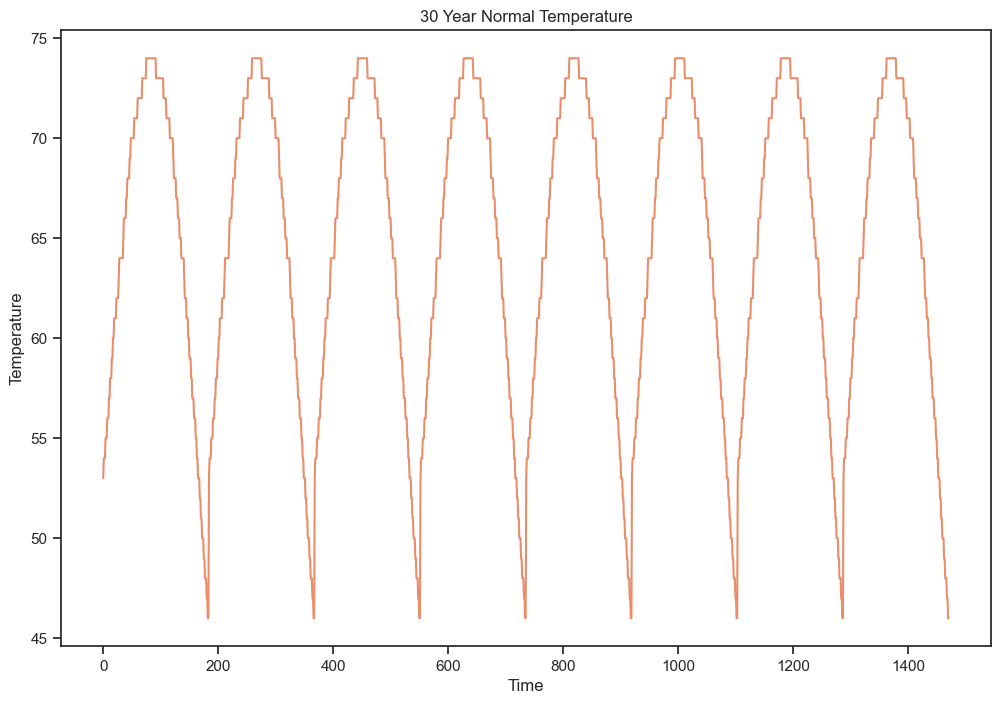

In [1527]:
# plotting trend for 30 year normal temperature
plt.figure(figsize=(12,8))
plt.plot(df_weather_2["30_yr_temp"])
plt.title("30 Year Normal Temperature")
plt.ylabel("Temperature")
plt.xlabel("Time")

In [1528]:
# Calculate Depart value for station 2
df_weather_2["Depart"] = df_weather_2["Tavg"] - df_weather_2["30_yr_temp"]
df_weather_2.head()

,index,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,30_yr_temp
0,1,2,2007-05-01,84,52,68.0,15.0,51,57,0,3,-,-,,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6,53.0
1,3,2,2007-05-02,60,43,52.0,-2.0,42,47,13,0,-,-,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4,54.0
2,5,2,2007-05-03,67,48,58.0,4.0,40,50,7,0,-,-,HZ,NaN,NaN,NaN,0.00,29.46,30.12,12.9,6,13.2,54.0
3,7,2,2007-05-04,78,51,65.0,11.0,42,50,NaN,NaN,-,-,,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4,54.0
4,9,2,2007-05-05,66,54,60.0,5.0,39,50,5,0,-,-,,NaN,NaN,NaN,T,29.46,30.09,11.2,7,11.5,55.0


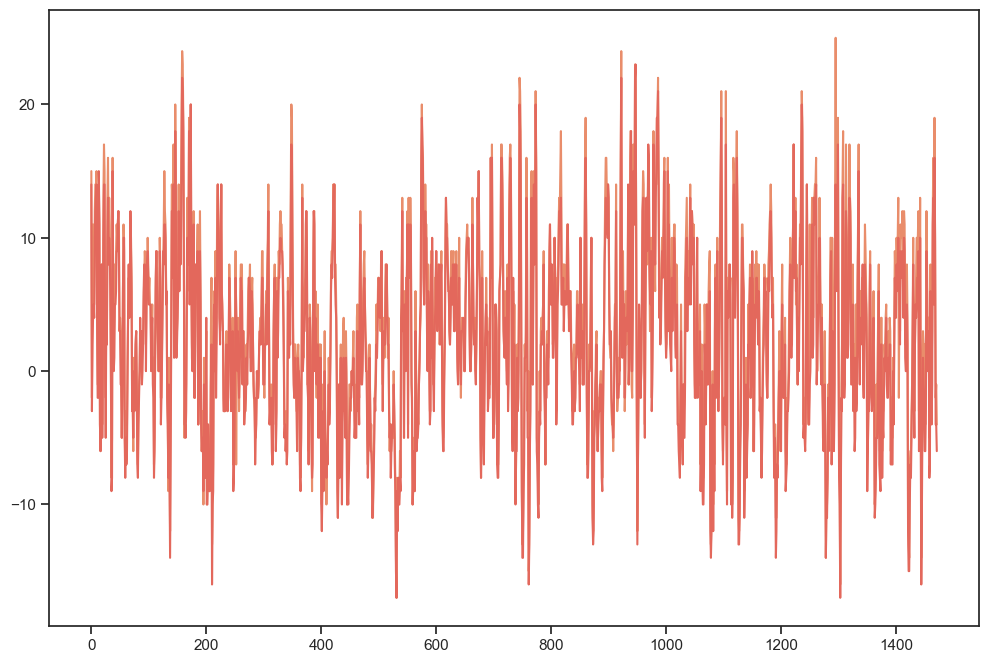

In [1529]:
plt.figure(figsize=(12,8))
plt.plot(df_weather_2["Depart"])
plt.plot(df_weather_1["Depart"])

##### Wet Bulb

In [1530]:
# checking for null values
display(df_weather_1[df_weather_1["WetBulb"].isnull()])
display(df_weather_2[df_weather_2["WetBulb"].isnull()])

,index,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
424,848,1,2009-06-26,86,69,78.0,7.0,60,NaN,0,13,0418,1931,,0,NaN,0.0,0.00,NaN,29.85,6.4,4,8.2
1205,2410,1,2013-08-10,81,64,73.0,0.0,57,NaN,0,8,0454,1900,,0,NaN,0.0,0.00,NaN,30.08,5.3,5,6.5
1206,2412,1,2013-08-11,81,60,71.0,-2.0,61,NaN,0,6,0455,1859,RA,0,NaN,0.0,0.01,29.35,30.07,2.0,27,3.0


,index,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,30_yr_temp
1207,2415,2,2013-08-12,85,69,77.0,4.0,63,NaN,0,12,-,-,RA,NaN,NaN,NaN,0.66,29.27,29.92,4.5,26,7.7,73.0


In [1531]:
# replace null values
df_weather_1["WetBulb"]=df_weather_1["WetBulb"].fillna(method="ffill").astype(float)
df_weather_2["WetBulb"]=df_weather_2["WetBulb"].fillna(method="ffill").astype(float)

##### Heat/Cool

In [1532]:
# Port over Heat values from station 1 to replace null values
for i in df_weather_2.index:
    if df_weather_2.loc[i,"Heat"] is np.NaN:
        df_weather_2.loc[i,"Heat"] = df_weather_1.loc[i,"Heat"]
        
# Port over Cool values from station 1 to replace null values
for i in df_weather_2.index:
    if df_weather_2.loc[i,"Cool"] is np.NaN:
        df_weather_2.loc[i,"Cool"] = df_weather_1.loc[i,"Cool"]

In [1533]:
# change to float
df_weather_1["Heat"] = df_weather_1["Heat"].astype(float) 
df_weather_2["Heat"] = df_weather_2["Heat"].astype(float)

In [1534]:
# change to float
df_weather_1["Cool"] = df_weather_1["Cool"].astype(float) 
df_weather_2["Cool"] = df_weather_2["Cool"].astype(float) 

##### Sunrise/Sunset

In [1535]:
# Check on unique values for sunrise in station 2
df_weather_2["Sunrise"].unique()

array(['-'], dtype=object)

In [1536]:
# Check on unique values for sunset in station 2
df_weather_2["Sunset"].unique()

array(['-'], dtype=object)

In [1537]:
# Port over Sunrise values from station 1 to replace "-" values
for i in df_weather_2.index:
    if df_weather_2.loc[i,"Sunrise"] is "-":
        df_weather_2.loc[i,"Sunrise"] = df_weather_1.loc[i,"Sunrise"]

# Port over Sunset values from station 1 to replace "-" values
for i in df_weather_2.index:
    if df_weather_2.loc[i,"Sunset"] is "-":
        df_weather_2.loc[i,"Sunset"] = df_weather_1.loc[i,"Sunset"]

In [1538]:
df_weather_2.head()

,index,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,30_yr_temp
0,1,2,2007-05-01,84,52,68.0,15.0,51,57.0,0.0,3.0,0448,1849,,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6,53.0
1,3,2,2007-05-02,60,43,52.0,-2.0,42,47.0,13.0,0.0,0447,1850,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4,54.0
2,5,2,2007-05-03,67,48,58.0,4.0,40,50.0,7.0,0.0,0446,1851,HZ,NaN,NaN,NaN,0.00,29.46,30.12,12.9,6,13.2,54.0
3,7,2,2007-05-04,78,51,65.0,11.0,42,50.0,7.0,0.0,0444,1852,,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4,54.0
4,9,2,2007-05-05,66,54,60.0,5.0,39,50.0,5.0,0.0,0443,1853,,NaN,NaN,NaN,T,29.46,30.09,11.2,7,11.5,55.0


In [1539]:
# convert sunrise to python readable time format
df_weather_1["Sunrise_1"] = pd.to_datetime(df_weather_1['Sunrise'], format='%H%M')
df_weather_2["Sunrise_1"] = pd.to_datetime(df_weather_2['Sunrise'], format='%H%M')

In [1540]:
# changing sunset values with e.g. 1860 to 1900, so that datatime method can convert values. 
# weather_1
for i in range(len(df_weather_1)):
    a = list((df_weather_1.loc[i,"Sunset"]))
    if a[2] == '6':
        a[2] = '0'
        a[1] = str(int(a[1]) + 1)
        df_weather_1.loc[i,"Sunset"] = ''.join(a)

#weather_2
for i in range(len(df_weather_2)):
    a = list((df_weather_2.loc[i,"Sunset"]))
    if a[2] == '6':
        a[2] = '0'
        a[1] = str(int(a[1]) + 1)
        df_weather_2.loc[i,"Sunset"] = ''.join(a)

In [1541]:
# convert sunrise to python readable time format
df_weather_1["Sunset_1"] = pd.to_datetime(df_weather_1['Sunset'], format='%H%M')
df_weather_2["Sunset_1"] = pd.to_datetime(df_weather_2['Sunset'], format='%H%M')

In [1542]:
# find delta duration between sunrise and sunset
df_weather_1["daylight_duration"] = df_weather_1["Sunset_1"] - df_weather_1["Sunrise_1"]
df_weather_2["daylight_duration"] = df_weather_2["Sunset_1"] - df_weather_2["Sunrise_1"]

In [1543]:
df_weather_2["daylight_duration"].unique()

array([50460000000000, 50580000000000, 50700000000000, 50880000000000,
       51000000000000, 51180000000000, 51300000000000, 51480000000000,
       51600000000000, 51720000000000, 51840000000000, 51960000000000,
       52080000000000, 52200000000000, 52320000000000, 52440000000000,
       52560000000000, 52680000000000, 52800000000000, 52920000000000,
       53040000000000, 53160000000000, 53220000000000, 53340000000000,
       53460000000000, 53580000000000, 53640000000000, 53700000000000,
       53760000000000, 53880000000000, 53940000000000, 54060000000000,
       54180000000000, 54240000000000, 54360000000000, 54420000000000,
       54480000000000, 54540000000000, 54600000000000, 54660000000000,
       54720000000000, 54780000000000, 54840000000000, 54300000000000,
       54120000000000, 53820000000000, 53520000000000, 53400000000000,
       53280000000000, 52740000000000, 52620000000000, 52500000000000,
       52380000000000, 52260000000000, 52140000000000, 51360000000000,
      

##### Codesum

In [1544]:
# replace blank values with Clear
df_weather_1["CodeSum"].replace(to_replace=' ',value="Clear", inplace = True)
df_weather_2["CodeSum"].replace(to_replace=' ',value="Clear", inplace = True)

In [1545]:
display(df_weather_1["CodeSum"].unique())
display(df_weather_2["CodeSum"].unique())

array(['Clear', 'BR', 'RA', 'BR HZ', 'RA BR', 'RA VCTS', 'RA HZ',
       'TSRA RA BR HZ', 'HZ', 'TSRA BR HZ', 'TSRA RA BR', 'TSRA RA HZ',
       'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU', 'BR HZ FU',
       'TSRA RA VCTS', 'HZ VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'RA BR HZ', 'TSRA RA',
       'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA', 'TS TSRA RA BR VCTS',
       'TS RA', 'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TSRA RA FG+ FG BR', 'TSRA DZ FG+ FG BR HZ', 'TS TSRA',
       'TSRA HZ', 'TS', 'FG+ BR HZ', 'TS TSRA BR HZ', 'DZ BR HZ',
       'TS TSRA BR', 'RA BR FU', 'TS BR HZ', 'FG+ BR', 'FG+ MIFG BR',
       'TSRA RA FG BR', 'DZ', 'RA DZ BR HZ', 'TS BR', 'TS RA FG+ FG BR',
       'RA DZ FG+ FG BR', 'RA BR SQ', 'RA FG BR', 'RA BR HZ FU',
       'MIFG BCFG BR', 'TSRA RA FG+ FG BR HZ', 'TSRA DZ BR HZ',
       'TS TSRA RA FG BR HZ', 'RA DZ FG+ BR', 'TSRA FG+ BR HZ',
       'FG+ FG BR HZ', 'FG BR HZ', 'TS RA BR HZ',

array(['Clear', 'BR HZ', 'HZ', 'TSRA RA BR', 'RA BR', 'TSRA RA', 'RA HZ',
       'TSRA BR HZ', 'RA BR HZ VCTS', 'RA', 'TSRA RA HZ', 'TSRA RA HZ FU',
       'BR', 'TSRA HZ', 'VCTS', 'TS TSRA RA BR HZ VCTS', 'TS TSRA BR HZ',
       'RA BR HZ', 'TSRA RA BR VCTS', 'TSRA RA DZ BR HZ', 'TSRA',
       'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA BR HZ', 'TS TSRA BR',
       'TSRA RA BR HZ', 'RA BCFG BR', 'TSRA BR', 'RA DZ', 'RA DZ BR',
       'TS TSRA RA HZ', 'TS BR', 'RA BR SQ', 'TS TSRA RA', 'TS RA',
       'TSRA RA VCTS', 'TSRA RA BR HZ VCTS', 'BR VCTS', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR', 'DZ BR HZ', 'DZ', 'FG+ FG BR', 'FG+ BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG BR HZ',
       'TS TSRA RA FG BR', 'TS BR HZ', 'BR HZ VCFG', 'TSRA RA FG+ BR',
       'TS TSRA RA VCTS', 'FU', 'TS', 'TS TSRA VCFG', 'TS TSRA HZ',
       'TS TSRA GR RA BR', 'HZ FU', 'RA BR HZ FU', 'FG+ BCFG BR',
       'TSRA RA FG+ FG BR', 'FG+', 'TSRA BR SQ', 'RA BR HZ VCFG',
       'RA FG+ BR', 'FG BR H

##### Depth

In [1546]:
# check on Depth unique values
display(df_weather_1["Depth"].unique())
display(df_weather_2["Depth"].unique())

array(['0'], dtype=object)

array([nan], dtype=object)

In [1547]:
# drop Depth since all 0 values
df_weather_1.drop("Depth", axis = 1, inplace = True)

# drop Depth since all nan values
df_weather_2.drop("Depth", axis = 1, inplace = True)

##### Water1

In [1548]:
# drop Water1, since all null values
df_weather_1.drop("Water1", axis = 1, inplace = True)
df_weather_2.drop("Water1", axis = 1, inplace = True)

##### SnowFall

In [1549]:
# check on SnowFall unique values
display(df_weather_1["SnowFall"].unique())
display(df_weather_2["SnowFall"].unique())

array(['0.0', '  T', '0.1'], dtype=object)

array([nan], dtype=object)

In [1550]:
# replace Trace values with 0 - since a trace is anything less than can be measured
df_weather_1["SnowFall"].replace(to_replace= '  T', value="0.0", inplace = True)

In [1551]:
# Port over SnowFall values from station 1 to replace "nan" values
for i in df_weather_2.index:
    if df_weather_2.loc[i,"SnowFall"] is np.NaN:
        df_weather_2.loc[i,"SnowFall"] = df_weather_1.loc[i,"SnowFall"]

In [1552]:
# change to float datatype
df_weather_1["SnowFall"] = df_weather_1["SnowFall"].astype(float)
df_weather_2["SnowFall"] = df_weather_2["SnowFall"].astype(float)

##### Precipitotal

In [1553]:
display(df_weather_1["PrecipTotal"].unique())
display(df_weather_2["PrecipTotal"].unique())

array(['0.00', '  T', '0.13', '0.38', '0.14', '0.07', '0.02', '1.01',
       '0.04', '0.01', '0.19', '0.39', '0.42', '0.28', '0.58', '0.05',
       '0.16', '0.15', '0.40', '0.30', '0.43', '0.11', '1.55', '0.17',
       '0.03', '1.43', '0.26', '1.31', '0.06', '0.29', '0.41', '0.23',
       '0.09', '1.33', '0.91', '0.37', '2.35', '0.24', '0.34', '0.18',
       '0.36', '0.27', '0.33', '1.28', '0.76', '0.95', '0.08', '0.12',
       '0.48', '0.52', '0.64', '1.24', '0.20', '0.72', '0.73', '1.61',
       '0.74', '1.05', '2.43', '2.90', '1.23', '6.64', '1.44', '0.82',
       '0.80', '0.32', '0.67', '0.55', '1.73', '0.44', '0.45', '3.97',
       '0.25', '0.68', '0.63', '0.35', '0.93', '0.22', '0.75', '0.89',
       '0.21', '0.46', '1.03', '0.60', '0.81', '0.97', '1.49', '1.02',
       '0.59', '0.87', '0.85', '0.54', '0.79', '2.79', '3.64', '0.10',
       '0.31', '2.24', '1.06', '1.88', '6.86', '0.71', '0.70', '1.11',
       '0.65', '1.21', '0.77', '1.34', '0.47', '1.12', '0.57', '0.51',
       

array(['0.00', '  T', '0.02', '0.60', '0.07', '0.11', '0.09', '0.28',
       '0.08', '0.53', '0.21', '0.32', '0.31', '0.27', '0.16', '0.93',
       '0.34', '0.35', nan, '0.66', '0.24', '0.92', '0.01', '0.89',
       '0.04', '0.97', '0.05', '0.06', '0.46', '0.23', '0.45', '0.83',
       '0.42', '1.33', '0.48', '0.88', '1.96', '0.20', '0.25', '0.67',
       '0.14', '0.17', '0.19', '0.15', '0.03', '0.41', '0.74', '0.71',
       '1.46', '0.26', '0.30', '0.22', '1.31', '0.29', '0.12', '0.43',
       '0.65', '1.22', '0.13', '0.50', '0.59', '2.68', '1.01', '0.62',
       '3.07', '1.75', '0.86', '0.63', '1.03', '0.70', '1.38', '1.14',
       '1.07', '0.87', '0.78', '1.12', '0.10', '0.61', '0.54', '1.19',
       '0.44', '0.33', '0.84', '1.29', '1.05', '1.15', '0.72', '0.40',
       '1.57', '1.30', '0.51', '1.23', '0.77', '3.15', '4.73', '0.52',
       '1.60', '0.57', '0.37', '1.90', '0.18', '0.69', '2.17', '0.36',
       '0.49', '0.39', '0.90', '0.38', '0.56', '0.55', '1.02', '3.66',
       '1.

In [1554]:
# replace Trace values with 0 - since a trace is anything less than can be measured
df_weather_1["PrecipTotal"].replace(to_replace= '  T', value="0.00", inplace = True)
df_weather_2["PrecipTotal"].replace(to_replace= '  T', value="0.00", inplace = True)

In [1555]:
# replace null values for PrecipTotal for station 2 with rain fall from the previous day.
df_weather_2["PrecipTotal"]=df_weather_2["PrecipTotal"].fillna(method="ffill").astype(float)

In [1556]:
# change to float datatype
df_weather_1["PrecipTotal"] = df_weather_1["PrecipTotal"].astype(float)

##### StnPressure

In [1557]:
# fill null values for StnPressure with previous day values
df_weather_1["StnPressure"] = df_weather_1["StnPressure"].fillna(method="ffill").astype(float)
df_weather_2["StnPressure"] = df_weather_2["StnPressure"].fillna(method="ffill").astype(float)

##### SeaLevel

In [1558]:
# fill null values for SeaLevel with previous day values
df_weather_1["SeaLevel"] = df_weather_1["SeaLevel"].fillna(method="ffill").astype(float)
df_weather_2["SeaLevel"] = df_weather_2["SeaLevel"].fillna(method="ffill").astype(float)

##### AvgSpeed

In [1559]:
# fill null values for AvgSpeed with previous day values
df_weather_2["AvgSpeed"] = df_weather_2["AvgSpeed"].fillna(method="ffill")

In [1560]:
df_weather_1["AvgSpeed"] = df_weather_1["AvgSpeed"].astype(float)
df_weather_2["AvgSpeed"] = df_weather_2["AvgSpeed"].astype(float)

In [1561]:
display(df_weather_1.info())
display(df_weather_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   index              1472 non-null   int64          
 1   Station            1472 non-null   int64          
 2   Date               1472 non-null   datetime64[ns] 
 3   Tmax               1472 non-null   int64          
 4   Tmin               1472 non-null   int64          
 5   Tavg               1472 non-null   float64        
 6   Depart             1472 non-null   float64        
 7   DewPoint           1472 non-null   int64          
 8   WetBulb            1472 non-null   float64        
 9   Heat               1472 non-null   float64        
 10  Cool               1472 non-null   float64        
 11  Sunrise            1472 non-null   object         
 12  Sunset             1472 non-null   object         
 13  CodeSum            1472 non-null   object       

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   index              1472 non-null   int64          
 1   Station            1472 non-null   int64          
 2   Date               1472 non-null   datetime64[ns] 
 3   Tmax               1472 non-null   int64          
 4   Tmin               1472 non-null   int64          
 5   Tavg               1472 non-null   float64        
 6   Depart             1472 non-null   float64        
 7   DewPoint           1472 non-null   int64          
 8   WetBulb            1472 non-null   float64        
 9   Heat               1472 non-null   float64        
 10  Cool               1472 non-null   float64        
 11  Sunrise            1472 non-null   object         
 12  Sunset             1472 non-null   object         
 13  CodeSum            1472 non-null   object       

None

##### Humidity

In [1562]:
df_weather_1.head()

,index,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_1,Sunset_1,daylight_duration
0,0,1,2007-05-01,83,50,67.0,14.0,51,56.0,0.0,2.0,0448,1849,Clear,0.0,0.0,29.10,29.82,1.7,27,9.2,1900-01-01 04:48:00,1900-01-01 18:49:00,0 days 14:01:00
1,2,1,2007-05-02,59,42,51.0,-3.0,42,47.0,14.0,0.0,0447,1850,BR,0.0,0.0,29.38,30.09,13.0,4,13.4,1900-01-01 04:47:00,1900-01-01 18:50:00,0 days 14:03:00
2,4,1,2007-05-03,66,46,56.0,2.0,40,48.0,9.0,0.0,0446,1851,Clear,0.0,0.0,29.39,30.12,11.7,7,11.9,1900-01-01 04:46:00,1900-01-01 18:51:00,0 days 14:05:00
3,6,1,2007-05-04,66,49,58.0,4.0,41,50.0,7.0,0.0,0444,1852,RA,0.0,0.0,29.31,30.05,10.4,8,10.8,1900-01-01 04:44:00,1900-01-01 18:52:00,0 days 14:08:00
4,8,1,2007-05-05,66,53,60.0,5.0,38,49.0,5.0,0.0,0443,1853,Clear,0.0,0.0,29.40,30.10,11.7,7,12.0,1900-01-01 04:43:00,1900-01-01 18:53:00,0 days 14:10:00


In [1563]:
# Relative humidity calculator
def RH_cal(Dp_f,T_f):
    Dp_c = (Dp_f-32)/1.8
    T_c = (T_f-32)/1.8
    RH = 100*((math.exp((17.625*Dp_c)/(243.04+Dp_c)))/(math.exp((17.625*T_c)/(243.04+T_c))))
    return RH

In [1564]:
# calculate humidity values 
df_weather_1["Humidity"] = 0
for i in range(len(df_weather_1)):
    df_weather_1.loc[i,"Humidity"] = round(RH_cal(df_weather_1.loc[i,"DewPoint"],df_weather_1.loc[i,"Tavg"]),2)
    
df_weather_2["Humidity"] = 0
for i in range(len(df_weather_2)):
    df_weather_2.loc[i,"Humidity"] = round(RH_cal(df_weather_2.loc[i,"DewPoint"],df_weather_2.loc[i,"Tavg"]),2)

In [1565]:
# display humidity values
display(df_weather_1.loc[:,["Humidity","Tavg","DewPoint"]].head())
display(df_weather_2.loc[:,["Humidity","Tavg","DewPoint"]].head())

,Humidity,Tavg,DewPoint
0,56.44,67.0,51
1,71.20,51.0,42
2,54.87,56.0,40
3,53.08,58.0,41
4,43.97,60.0,38


,Humidity,Tavg,DewPoint
0,54.53,68.0,51
1,68.61,52.0,42
2,51.06,58.0,40
3,43.07,65.0,42
4,45.72,60.0,39


#### Add in time lag for features

In [1566]:
# extract the date features before setting as index --> for station 1 and 2
df_weather_1['Year'] = df_weather_1['Date'].apply(lambda x: x.year)
df_weather_1['Month'] = df_weather_1['Date'].apply(lambda x: x.month)
df_weather_1['Week'] = df_weather_1['Date'].apply(lambda x: x.week)
df_weather_1['DayOfWeek'] = df_weather_1['Date'].apply(lambda x: x.dayofweek)

df_weather_2['Year'] = df_weather_2['Date'].apply(lambda x: x.year)
df_weather_2['Month'] = df_weather_2['Date'].apply(lambda x: x.month)
df_weather_2['Week'] = df_weather_2['Date'].apply(lambda x: x.week)
df_weather_2['DayOfWeek'] = df_weather_2['Date'].apply(lambda x: x.dayofweek)

In [1567]:
# changing index to date time
df_weather_1.set_index("Date", inplace = True)
df_weather_2.set_index("Date", inplace = True)

In [1568]:
df_weather_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1472 entries, 2007-05-01 to 2014-10-31
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   index              1472 non-null   int64          
 1   Station            1472 non-null   int64          
 2   Tmax               1472 non-null   int64          
 3   Tmin               1472 non-null   int64          
 4   Tavg               1472 non-null   float64        
 5   Depart             1472 non-null   float64        
 6   DewPoint           1472 non-null   int64          
 7   WetBulb            1472 non-null   float64        
 8   Heat               1472 non-null   float64        
 9   Cool               1472 non-null   float64        
 10  Sunrise            1472 non-null   object         
 11  Sunset             1472 non-null   object         
 12  CodeSum            1472 non-null   object         
 13  SnowFall           1472 non-nu

In [1569]:
# sorting index
df_weather_1.sort_index(inplace = True)
df_weather_2.sort_index(inplace = True)

In [1570]:
df_weather_final = df_weather_1.drop("index",axis=1).append(df_weather_2.drop(["30_yr_temp",'index'],axis=1))
df_weather_final = df_weather_final.sort_index()
df_weather_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2944 entries, 2007-05-01 to 2014-10-31
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Station            2944 non-null   int64          
 1   Tmax               2944 non-null   int64          
 2   Tmin               2944 non-null   int64          
 3   Tavg               2944 non-null   float64        
 4   Depart             2944 non-null   float64        
 5   DewPoint           2944 non-null   int64          
 6   WetBulb            2944 non-null   float64        
 7   Heat               2944 non-null   float64        
 8   Cool               2944 non-null   float64        
 9   Sunrise            2944 non-null   object         
 10  Sunset             2944 non-null   object         
 11  CodeSum            2944 non-null   object         
 12  SnowFall           2944 non-null   float64        
 13  PrecipTotal        2944 non-nu

In [1571]:
# df_weather_final['YearWeek'] = df_weather_final['Year'].astype(str) + df_weather_final['Week'].astype(str)

In [1572]:
df_weather_final.columns

Index(['Station', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb',
       'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'SnowFall',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed', 'Sunrise_1', 'Sunset_1', 'daylight_duration', 'Humidity',
       'Year', 'Month', 'Week', 'DayOfWeek'],
      dtype='object')

In [1573]:
def rename_header(days):    
    dict = {'Tavg':f'Tavg_{days}','Depart':f'Depart_{days}', 'DewPoint':f'DewPoint_{days}', 'WetBulb':f'WetBulb_{days}',
       'Heat':f'Heat_{days}', 'Cool':f'Cool_{days}', 'Sunrise':f'Sunrise_{days}', 'Sunset':f'Sunset_{days}', 'SnowFall':f'SnowFall_{days}', 'PrecipTotal':f'PrecipTotal_{days}',
       'StnPressure':f'StnPressure_{days}', 'SeaLevel':f'SeaLevel_{days}', 'ResultSpeed':f'ResultSpeed_{days}', 'ResultDir':f'ResultDir_{days}', 'AvgSpeed':f'AvgSpeed_{days}',
       'Humidity':f'Humidity_{days}'}
    return dict

In [1586]:
# rolling mean for 7 days (not using the min_periods=1 as it creates high variance in the rolling window)
df_weather_final_7_days = df_weather_final[['Tavg', 'Depart', 'DewPoint', 'WetBulb',
       'Heat', 'Cool', 'Sunrise', 'Sunset', 'SnowFall', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed',
       'Humidity']].rolling(7).mean().fillna(method='bfill')

In [1587]:
# rolling mean for 14 days
df_weather_final_14_days = df_weather_final[['Tavg', 'Depart', 'DewPoint', 'WetBulb',
       'Heat', 'Cool', 'Sunrise', 'Sunset', 'SnowFall', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed',
       'Humidity']].rolling(14).mean().fillna(method='bfill')

In [1588]:
# rolling mean for 21 days
df_weather_final_21_days = df_weather_final[['Tavg', 'Depart', 'DewPoint', 'WetBulb',
       'Heat', 'Cool', 'Sunrise', 'Sunset', 'SnowFall', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed',
       'Humidity']].rolling(21).mean().fillna(method='bfill')

In [1589]:
df_weather_final_7_days.rename(columns=rename_header("7_days"), inplace=True)
df_weather_final_14_days.rename(columns=rename_header("14_days"), inplace=True)
df_weather_final_21_days.rename(columns=rename_header("21_days"), inplace=True)

In [1594]:
df_weather_final = df_weather_final.append([df_weather_final_7_days, df_weather_final_14_days, df_weather_final_21_days])

##### Merging Station 1 and 2 datasets

### Merge with df_train

In [ ]:
df_train_final = df_train.drop(["Address","Block","Street","AddressNumberAndStreet"],axis =1)

In [ ]:
# creating Station column for df_train
df_train_final["Station"] = df_train_final["Latitude"]
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             10506 non-null  datetime64[ns]
 1   Species          10506 non-null  object        
 2   Trap             10506 non-null  object        
 3   Latitude         10506 non-null  float64       
 4   Longitude        10506 non-null  float64       
 5   AddressAccuracy  10506 non-null  int64         
 6   NumMosquitos     10506 non-null  int64         
 7   WnvPresent       10506 non-null  int64         
 8   Year             10506 non-null  int64         
 9   Month            10506 non-null  int64         
 10  Week             10506 non-null  int64         
 11  DayOfWeek        10506 non-null  int64         
 12  Station          10506 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(7), object(2)
memory usage: 1.0+ MB


In [ ]:
# creating Station column for df_train
for i in range(0,len(df_train_final)):
    if df_train_final.iloc[i,3] >= 41.87548:
        df_train_final.iloc[i,12] = 1
    else:
        df_train_final.iloc[i,12] = 2

In [ ]:
df_train_final.groupby("Station").Latitude.count()

Station
1.0    4679
2.0    5827
Name: Latitude, dtype: int64

In [ ]:
#merging datasets
df_merged = pd.merge(df_train_final,df_weather_final, on = ["Date","Station"])

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 0 to 10505
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Date               10506 non-null  datetime64[ns] 
 1   Species            10506 non-null  object         
 2   Trap               10506 non-null  object         
 3   Latitude           10506 non-null  float64        
 4   Longitude          10506 non-null  float64        
 5   AddressAccuracy    10506 non-null  int64          
 6   NumMosquitos       10506 non-null  int64          
 7   WnvPresent         10506 non-null  int64          
 8   Year_x             10506 non-null  int64          
 9   Month_x            10506 non-null  int64          
 10  Week_x             10506 non-null  int64          
 11  DayOfWeek_x        10506 non-null  int64          
 12  Station            10506 non-null  float64        
 13  Tmax               10506 non-null  int64      

In [ ]:
df_merged = df_merged.drop(['Year_y', 'Month_y', 'Week_y', 'DayOfWeek_y'],axis=1)
df_merged = df_merged.rename(columns = {'Year_x':'Year', 'Month_x':'Month', 'Week_x':'Week', 'DayOfWeek_x':'DayOfWeek'})

In [ ]:
df_merged

,Date,Species,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Year,Month,Week,DayOfWeek,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_1,Sunset_1,daylight_duration,Humidity
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,9,1,0,2007,5,22,1,1.0,88,60,74.0,10.0,58,65.0,0.0,9.0,0421,1917,BR HZ,0.0,0.0,29.39,30.11,5.8,18,6.5,1900-01-01 04:21:00,1900-01-01 19:17:00,0 days 14:56:00,57.40
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,9,1,0,2007,5,22,1,1.0,88,60,74.0,10.0,58,65.0,0.0,9.0,0421,1917,BR HZ,0.0,0.0,29.39,30.11,5.8,18,6.5,1900-01-01 04:21:00,1900-01-01 19:17:00,0 days 14:56:00,57.40
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,9,1,0,2007,5,22,1,1.0,88,60,74.0,10.0,58,65.0,0.0,9.0,0421,1917,BR HZ,0.0,0.0,29.39,30.11,5.8,18,6.5,1900-01-01 04:21:00,1900-01-01 19:17:00,0 days 14:56:00,57.40
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,8,1,0,2007,5,22,1,1.0,88,60,74.0,10.0,58,65.0,0.0,9.0,0421,1917,BR HZ,0.0,0.0,29.39,30.11,5.8,18,6.5,1900-01-01 04:21:00,1900-01-01 19:17:00,0 days 14:56:00,57.40
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,8,4,0,2007,5,22,1,1.0,88,60,74.0,10.0,58,65.0,0.0,9.0,0421,1917,BR HZ,0.0,0.0,29.39,30.11,5.8,18,6.5,1900-01-01 04:21:00,1900-01-01 19:17:00,0 days 14:56:00,57.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,2013-09-26,CULEX PIPIENS/RESTUANS,T227,41.728495,-87.600963,5,7,0,2013,9,39,3,2.0,75,55,65.0,5.0,52,58.0,0.0,0.0,0543,1742,Clear,0.0,0.0,29.40,30.04,4.1,9,4.6,1900-01-01 05:43:00,1900-01-01 17:42:00,0 days 11:59:00,62.77
10502,2013-09-26,CULEX PIPIENS,T227,41.728495,-87.600963,5,1,0,2013,9,39,3,2.0,75,55,65.0,5.0,52,58.0,0.0,0.0,0543,1742,Clear,0.0,0.0,29.40,30.04,4.1,9,4.6,1900-01-01 05:43:00,1900-01-01 17:42:00,0 days 11:59:00,62.77
10503,2013-09-26,CULEX PIPIENS/RESTUANS,T226,41.793818,-87.654234,5,8,0,2013,9,39,3,2.0,75,55,65.0,5.0,52,58.0,0.0,0.0,0543,1742,Clear,0.0,0.0,29.40,30.04,4.1,9,4.6,1900-01-01 05:43:00,1900-01-01 17:42:00,0 days 11:59:00,62.77
10504,2013-09-26,CULEX PIPIENS/RESTUANS,T035,41.763733,-87.742302,8,6,1,2013,9,39,3,2.0,75,55,65.0,5.0,52,58.0,0.0,0.0,0543,1742,Clear,0.0,0.0,29.40,30.04,4.1,9,4.6,1900-01-01 05:43:00,1900-01-01 17:42:00,0 days 11:59:00,62.77


In [ ]:
df_merged['YearWeek'] = df_merged['Year'].astype(str) + df_merged['Week'].astype(str)

In [ ]:
df_merged['YearWeek']

In [ ]:
df_merged.groupby('YearWeek')['Tavg'].mean()

YearWeek
200722    75.080000
200723    56.350000
200726    74.215517
200727    66.675676
200728    70.000000
200729    75.965517
200730    77.000000
200731    80.658009
200732    81.735974
200733    75.115839
200734    77.264188
200735    80.000000
200736    79.317597
200737    56.325926
200738    76.152778
200739    79.515789
200740    68.654054
200741    63.961538
200922    59.220339
200923    58.260870
200924    61.516129
200925    74.280000
200926    78.662069
200927    70.451613
200928    73.902439
200929    66.246809
200930    72.376344
200931    72.387387
200932    70.083969
200933    74.066667
200935    68.695652
200936    66.000000
200938    66.378151
200939    65.000000
200940    51.169231
201123    60.274194
201124    71.915888
201125    64.000000
201126    76.082645
201128    79.452012
201130    80.611987
201131    76.535714
201132    72.570312
201133    76.512605
201134    71.547170
201135    83.955357
201137    64.775194
201138    55.000000
201139    51.688525
201323    6

### Merge with df_test

In [ ]:
df_test.info()

KeyboardInterrupt: 

In [ ]:
df_test_final = df_test.drop(["Id","Address","Block","Street","AddressNumberAndStreet"],axis =1)

In [ ]:
df_test_final["Date"] = pd.to_datetime(df_test_final["Date"])

In [ ]:
display(df_test_final.groupby("Species").Date.count())

Species
CULEX ERRATICUS           14345
CULEX PIPIENS             14521
CULEX PIPIENS/RESTUANS    15359
CULEX RESTUANS            14670
CULEX SALINARIUS          14355
CULEX TARSALIS            14347
CULEX TERRITANS           14351
UNSPECIFIED CULEX         14345
Name: Date, dtype: int64

In [ ]:
# creating Station column for df_train
df_test_final["Station"] = df_test_final["Latitude"]
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             116293 non-null  datetime64[ns]
 1   Species          116293 non-null  object        
 2   Trap             116293 non-null  object        
 3   Latitude         116293 non-null  float64       
 4   Longitude        116293 non-null  float64       
 5   AddressAccuracy  116293 non-null  int64         
 6   Station          116293 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 6.2+ MB


In [ ]:
# creating Station column for df_train
for i in range(0,len(df_test_final)):
    if df_test_final.iloc[i,3] >= 41.87548:
        df_test_final.iloc[i,6] = 1
    else:
        df_test_final.iloc[i,6] = 2

In [ ]:
df_test_final.groupby("Station").Latitude.count()

Station
1.0    52952
2.0    63341
Name: Latitude, dtype: int64

In [ ]:
df_test_final

,Date,Species,Trap,Latitude,Longitude,AddressAccuracy,Station
0,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,9,1.0
1,2008-06-11,CULEX RESTUANS,T002,41.954690,-87.800991,9,1.0
2,2008-06-11,CULEX PIPIENS,T002,41.954690,-87.800991,9,1.0
3,2008-06-11,CULEX SALINARIUS,T002,41.954690,-87.800991,9,1.0
4,2008-06-11,CULEX TERRITANS,T002,41.954690,-87.800991,9,1.0
...,...,...,...,...,...,...,...
116288,2014-10-02,CULEX SALINARIUS,T054C,41.925652,-87.633590,8,1.0
116289,2014-10-02,CULEX TERRITANS,T054C,41.925652,-87.633590,8,1.0
116290,2014-10-02,CULEX TARSALIS,T054C,41.925652,-87.633590,8,1.0
116291,2014-10-02,UNSPECIFIED CULEX,T054C,41.925652,-87.633590,8,1.0


In [ ]:
#merging datasets
df_merged_test = pd.merge(df_test_final,df_weather_final, on = ["Date","Station"])

In [ ]:
df_merged_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 0 to 116292
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   Date               116293 non-null  datetime64[ns] 
 1   Species            116293 non-null  object         
 2   Trap               116293 non-null  object         
 3   Latitude           116293 non-null  float64        
 4   Longitude          116293 non-null  float64        
 5   AddressAccuracy    116293 non-null  int64          
 6   Station            116293 non-null  float64        
 7   Tmax               116293 non-null  float64        
 8   Tmin               116293 non-null  float64        
 9   Tavg               116293 non-null  float64        
 10  Depart             116293 non-null  float64        
 11  DewPoint           116293 non-null  float64        
 12  WetBulb            116293 non-null  float64        
 13  Heat               116293 non

In [ ]:
# Export dataset
df_merged_test.to_csv('../assets/df_merge_test.csv', index=False)

## Exploratory Data Analysis

### Dataset: `train.csv`

In [ ]:
# set datetime column to be the index for df_train_final
df_train_final.set_index('Date', inplace=True)

In [ ]:
df_train_final.head()

,Species,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Year,Month,Week,DayOfWeek,Station
Date,,,,,,,,,,,,
2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,9,1,0,2007,5,22,1,1.0
2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,9,1,0,2007,5,22,1,1.0
2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,9,1,0,2007,5,22,1,1.0
2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,8,1,0,2007,5,22,1,1.0
2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,8,4,0,2007,5,22,1,1.0


##### Types of species and WNV breakdown

In [ ]:
df_train_final["NumMosquitos"].sum()

135039

In [ ]:
# for mosquitoes with West Nile Virus (Wnv)
df_train_final_1 = df_train_final[df_train_final["WnvPresent"]==1]
df_species_1 = pd.DataFrame(df_train_final_1.groupby("Species").NumMosquitos.sum())
df_species_1["Wnv"] = "With WNV"
df_species_1.sort_values("NumMosquitos",ascending = False)

,NumMosquitos,Wnv
Species,,
CULEX PIPIENS/RESTUANS,7123,With WNV
CULEX PIPIENS,6729,With WNV
CULEX RESTUANS,667,With WNV


In [ ]:
# for mosquitoes without West Nile Virus (Wnv)
df_train_final_0 = df_train_final[df_train_final["WnvPresent"]==0]
df_species_0 = pd.DataFrame(df_train_final_0.groupby("Species").NumMosquitos.sum())
df_species_0["Wnv"] = "Without WNV"
df_species_0.sort_values("NumMosquitos",ascending = False)

,NumMosquitos,Wnv
Species,,
CULEX PIPIENS/RESTUANS,59145,Without WNV
CULEX PIPIENS,37942,Without WNV
CULEX RESTUANS,22764,Without WNV
CULEX TERRITANS,510,Without WNV
CULEX SALINARIUS,145,Without WNV
CULEX ERRATICUS,7,Without WNV
CULEX TARSALIS,7,Without WNV


In [ ]:
# append both dataframes
df_species = df_species_1.append(df_species_0)
df_species

,NumMosquitos,Wnv
Species,,
CULEX PIPIENS,6729,With WNV
CULEX PIPIENS/RESTUANS,7123,With WNV
CULEX RESTUANS,667,With WNV
CULEX ERRATICUS,7,Without WNV
CULEX PIPIENS,37942,Without WNV
CULEX PIPIENS/RESTUANS,59145,Without WNV
CULEX RESTUANS,22764,Without WNV
CULEX SALINARIUS,145,Without WNV
CULEX TARSALIS,7,Without WNV


Text(0.5, 1.0, 'Infection Status of Mosquitos Classified by Species')

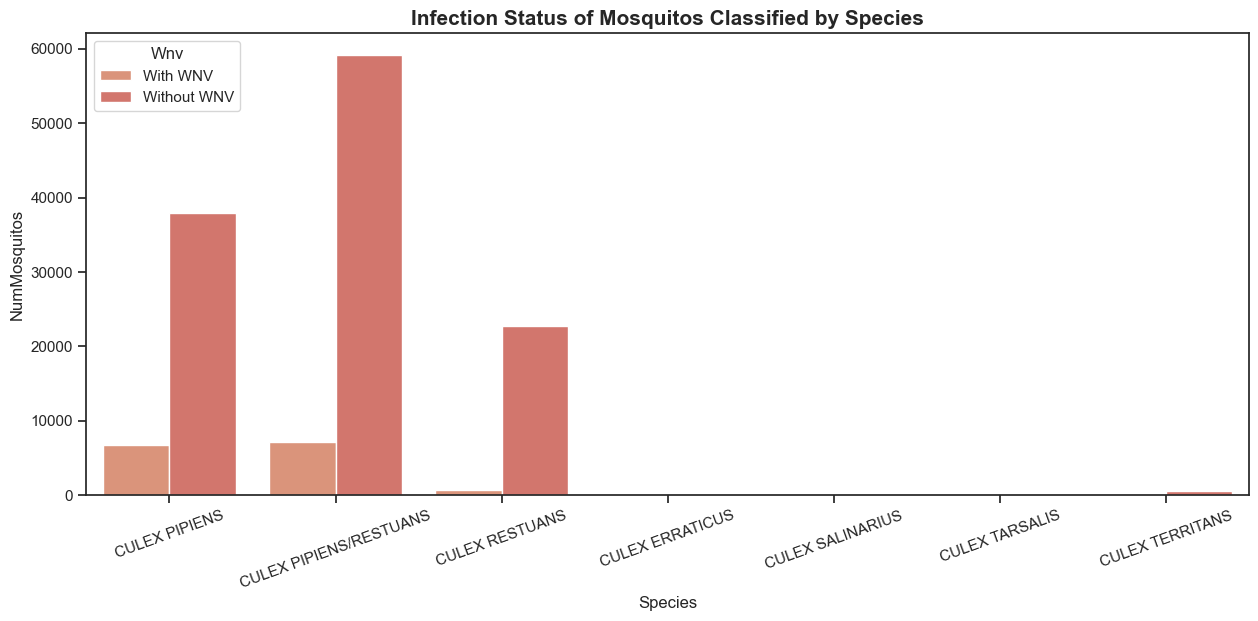

In [ ]:
# Mosquito species with/without WNV
plt.figure(figsize =(15,6))
plt.xticks(rotation=20)
sns.barplot(data=df_species, x=df_species.index, y='NumMosquitos', hue='Wnv')
plt.title("Infection Status of Mosquitos Classified by Species", fontsize = 15, fontweight='bold')

- Main mosquito species carrying WNV are CULEX PIPENS and CULEX RESTUANS
- More than 90% species of mosquito belong to CULEX PIPENS and CULEX RESTUANS

- By week, sub plot by year data
- compare to the spray data
- include the spray dates by plotting against 1/0

(21.0, 41.0)

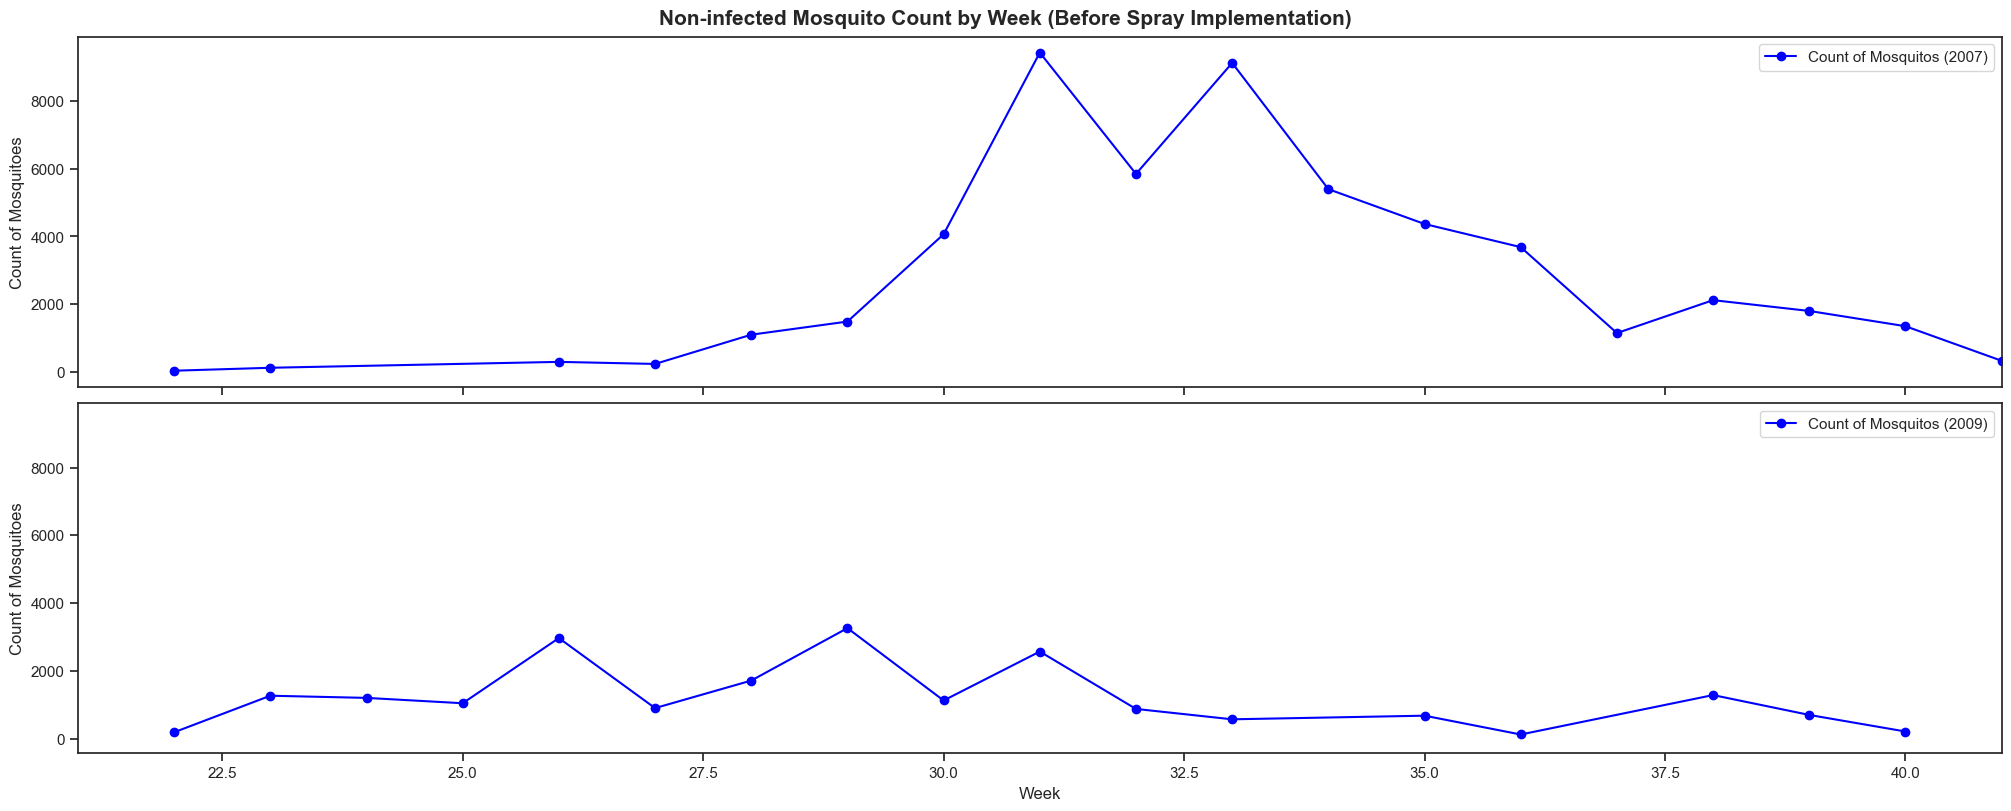

In [ ]:
fig, ax = plt.subplots(2, figsize=(20,8), sharey=True, sharex=True, layout="constrained")
plt.suptitle("Non-infected Mosquito Count by Week (Before Spray Implementation)", fontsize = 15, fontweight='bold')
ax[0].plot(df_train_final_0[df_train_final_0["Year"]==2007].groupby(['Week'])['NumMosquitos'].sum(), color = 'blue', marker="o")
ax[0].set_ylabel("Count of Mosquitoes", fontsize = 12)
ax[1].plot(df_train_final_0[df_train_final_0["Year"]==2009].groupby(['Week'])['NumMosquitos'].sum(), color = 'blue', marker="o")
ax[1].set_xlabel("Week", fontsize = 12)
ax[1].set_ylabel("Count of Mosquitoes", fontsize = 12)
ax[0].legend([f'Count of Mosquitos (2007)'])
ax[1].legend([f'Count of Mosquitos (2009)'])
plt.xlim([21, 41])

(21.0, 41.0)

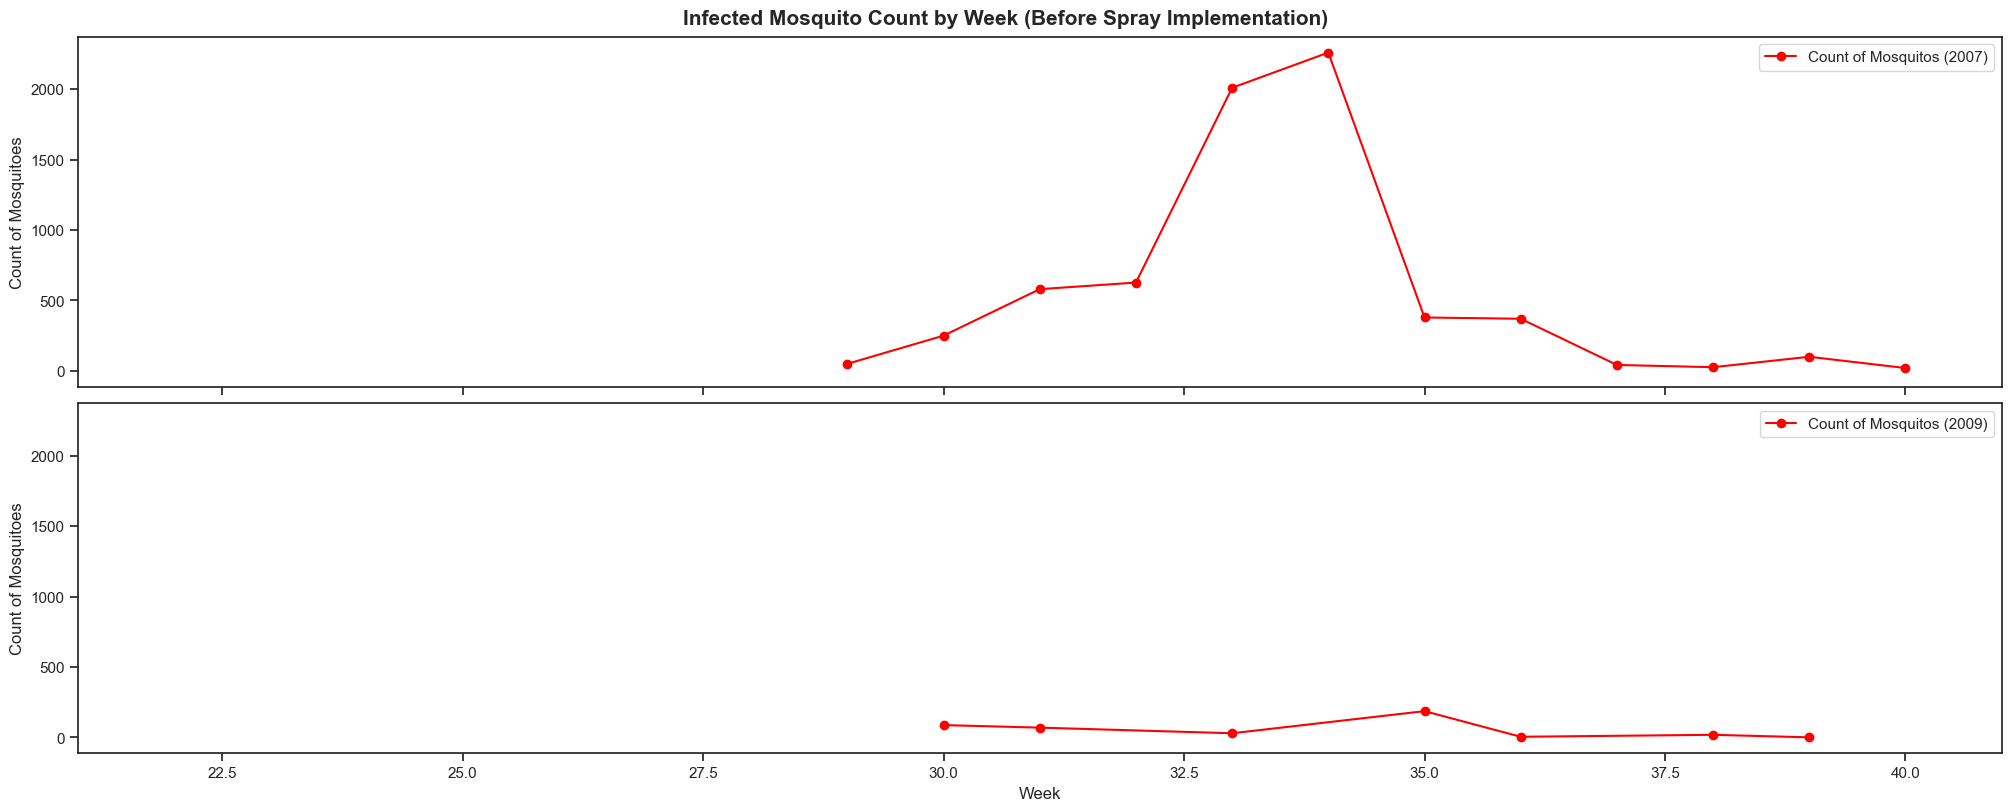

In [ ]:
fig, ax = plt.subplots(2, figsize=(20,8), sharey=True, sharex=True, layout="constrained")
plt.suptitle("Infected Mosquito Count by Week (Before Spray Implementation)", fontsize = 15, fontweight='bold')
ax[0].plot(df_train_final_1[df_train_final_1["Year"]==2007].groupby(['Week'])['NumMosquitos'].sum(), color = 'red', marker="o")
ax[0].set_ylabel("Count of Mosquitoes", fontsize = 12)
ax[1].plot(df_train_final_1[df_train_final_1["Year"]==2009].groupby(['Week'])['NumMosquitos'].sum(), color = 'red', marker="o")
ax[1].set_xlabel("Week", fontsize = 12)
ax[1].set_ylabel("Count of Mosquitoes", fontsize = 12)
ax[0].legend([f'Count of Mosquitos (2007)'])
ax[1].legend([f'Count of Mosquitos (2009)'])
plt.xlim([21, 41])

(21.0, 41.0)

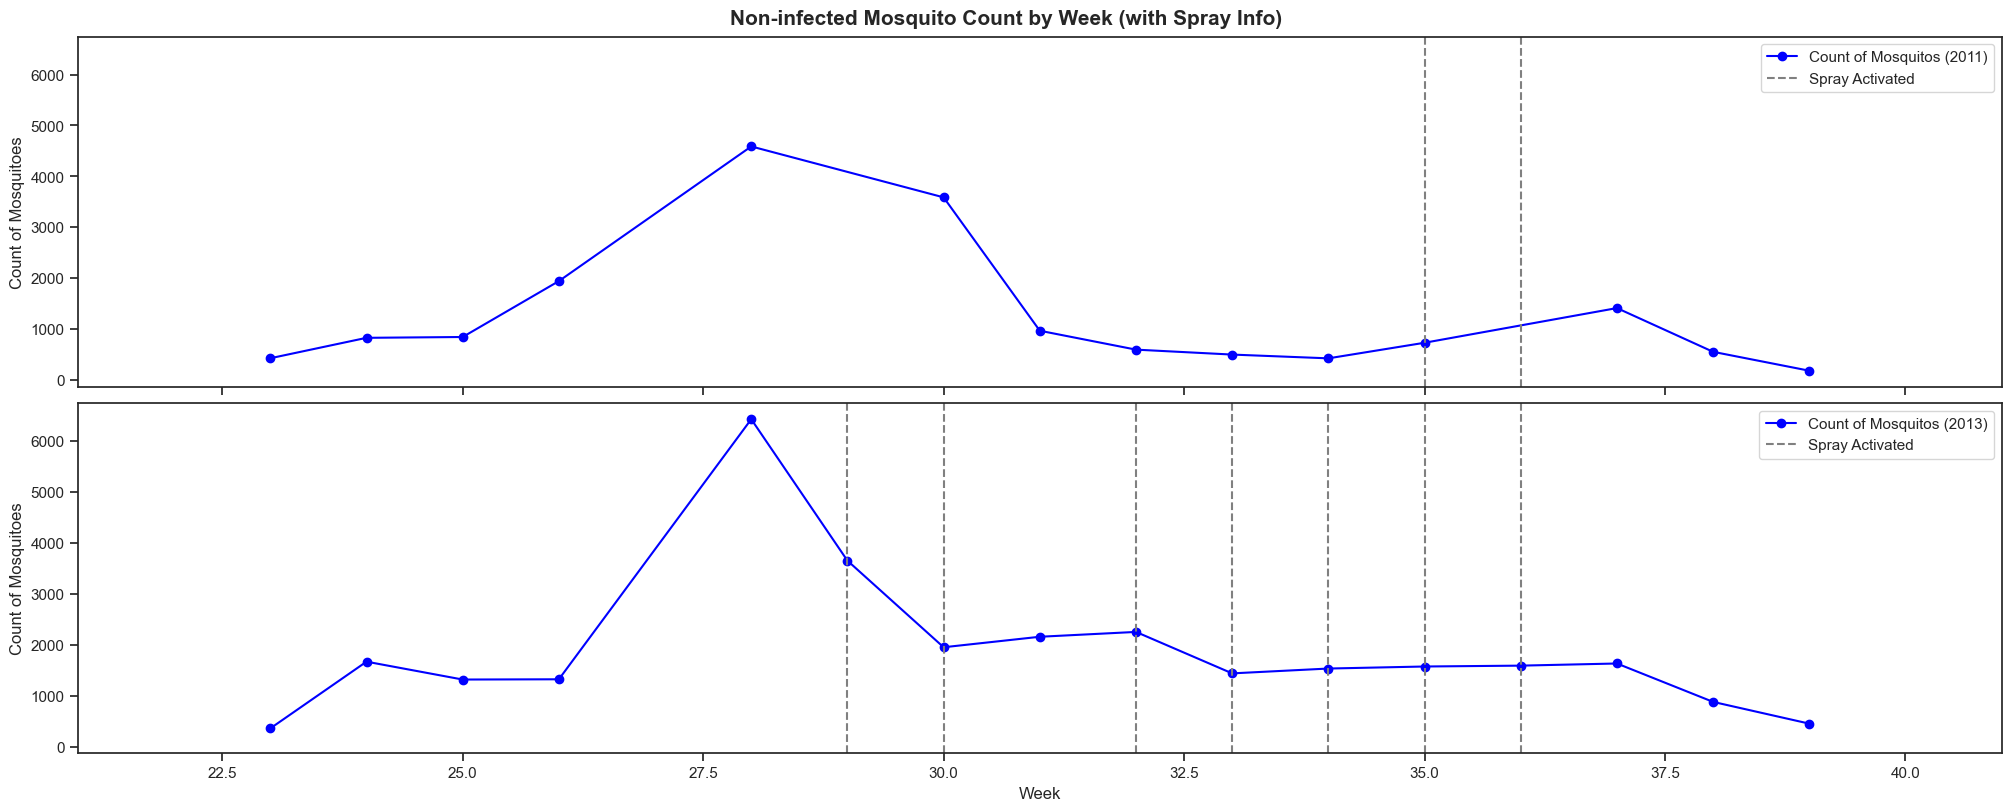

In [ ]:
fig, ax = plt.subplots(2, figsize=(20,8), sharey=True, sharex=True, layout="constrained")
plt.suptitle("Non-infected Mosquito Count by Week (with Spray Info)", fontsize = 15, fontweight='bold')
ax[0].plot(df_train_final_0[df_train_final_0["Year"]==2011].groupby(['Week'])['NumMosquitos'].sum(), color = 'blue', marker="o")
ax[0].set_ylabel("Count of Mosquitoes", fontsize = 12)
# ax[3].title.set_text("Year 2013")
ax[1].plot(df_train_final_0[df_train_final_0["Year"]==2013].groupby(['Week'])['NumMosquitos'].sum(), color = 'blue', marker="o")
ax[1].set_xlabel("Week", fontsize = 12)
ax[1].set_ylabel("Count of Mosquitoes", fontsize = 12)
for week in df_spray[df_spray["Year"]==2011]['Week'].unique():
    ax[0].axvline(x=week, linestyle='--', color='grey', label='Spray Activated')
for week in df_spray[df_spray["Year"]==2013]['Week'].unique():
    ax[1].axvline(x=week, linestyle='--', color='grey', label='Spray Activated')
ax[0].legend([f'Count of Mosquitos (2011)', 'Spray Activated'])
ax[1].legend([f'Count of Mosquitos (2013)', 'Spray Activated'])
plt.xlim([21, 41])

(21.0, 41.0)

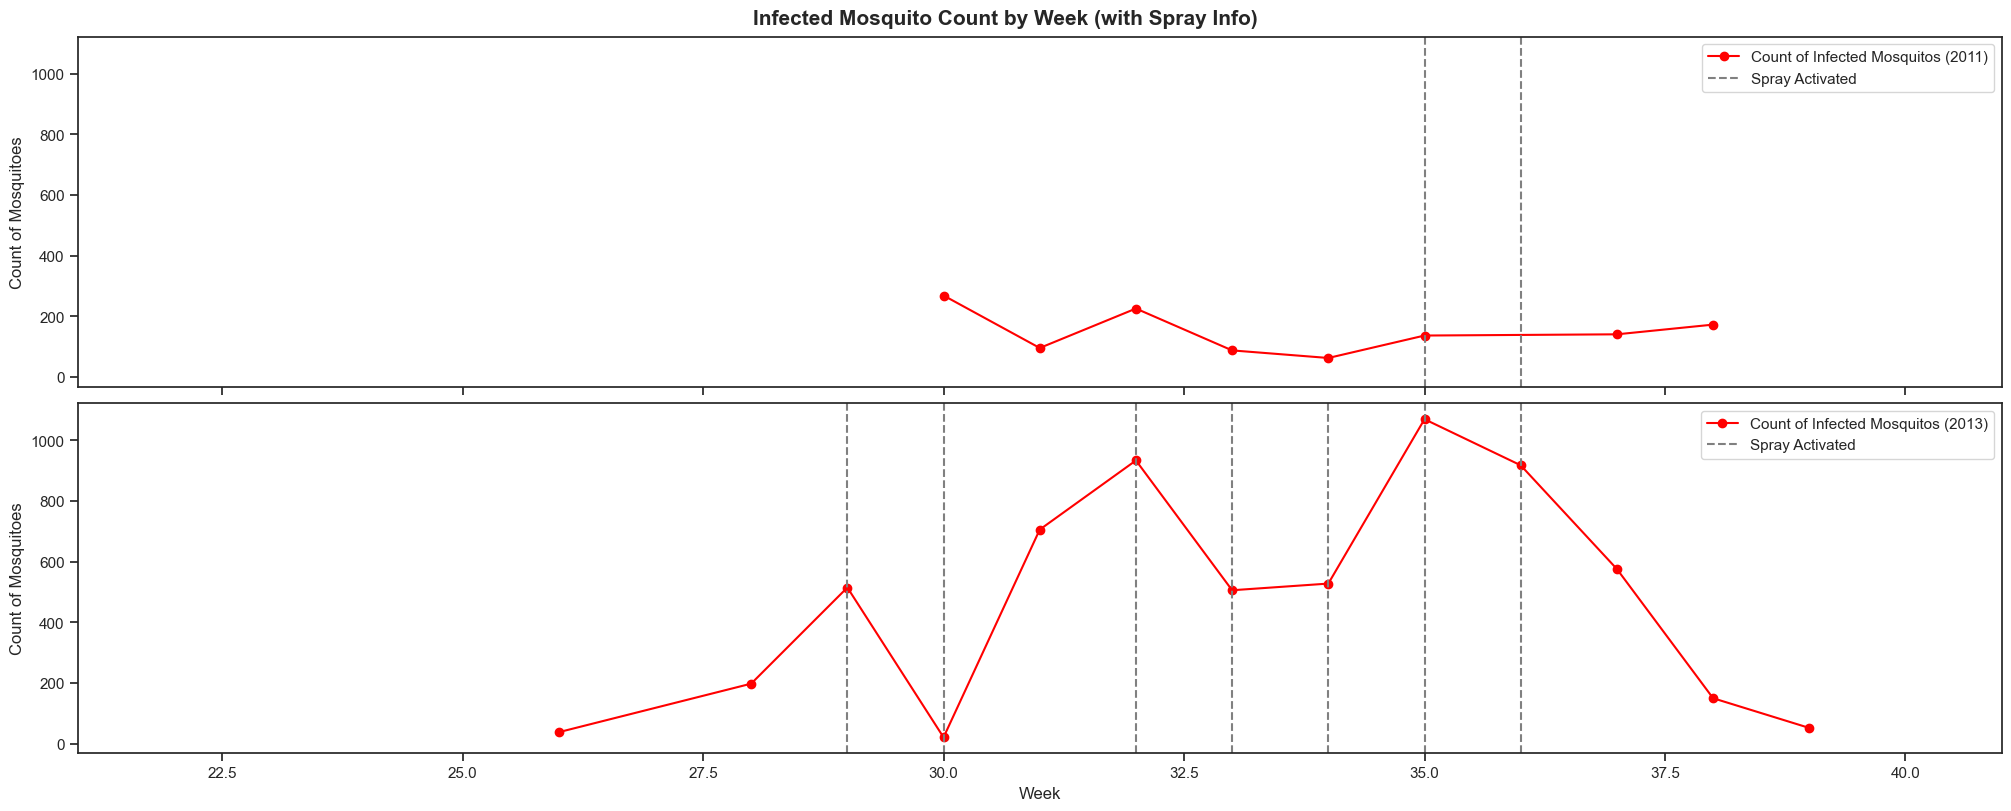

In [ ]:
fig, ax = plt.subplots(2, figsize=(20,8), sharey=True, sharex=True, layout="constrained")
plt.suptitle("Infected Mosquito Count by Week (with Spray Info)", fontsize = 15, fontweight='bold')
ax[0].plot(df_train_final_1[df_train_final_1["Year"]==2011].groupby(['Week'])['NumMosquitos'].sum(), color = 'red', marker="o")
ax[0].set_ylabel("Count of Mosquitoes", fontsize = 12)
ax[1].plot(df_train_final_1[df_train_final_1["Year"]==2013].groupby(['Week'])['NumMosquitos'].sum(), color = 'red', marker="o")
ax[1].set_ylabel("Count of Mosquitoes", fontsize = 12)
for week in df_spray[df_spray["Year"]==2011]['Week'].unique():
    ax[0].axvline(x=week, linestyle='--', color='grey', label='Spray Activated')
for week in df_spray[df_spray["Year"]==2013]['Week'].unique():
    ax[1].axvline(x=week, linestyle='--', color='grey', label='Spray Activated')
ax[0].legend([f'Count of Infected Mosquitos (2011)', 'Spray Activated'])
ax[1].legend([f'Count of Infected Mosquitos (2013)', 'Spray Activated'])
ax[1].set_xlabel("Week", fontsize = 12)
plt.xlim([21, 41])

In [ ]:
# number of mosquitoes by year
df_train_year_0 = df_train_final_0.resample('Y').sum()
df_train_year_1 = df_train_final_1.resample('Y').sum()

# append both datasets together
df_train_year = df_train_year_0.append(df_train_year_1)
df_train_year

,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Year,Month,Week,DayOfWeek,Station
Date,,,,,,,,,,
2007-12-31,149478.204330,-313410.884667,26705,51974,0,7175025,28768,117749,7050,5933.0
2008-12-31,0.000000,0.000000,0,0,0,0,0,0,0,0.0
2009-12-31,93339.780567,-195616.352542,17857,20708,0,4480070,16300,68054,5972,3337.0
2010-12-31,0.000000,0.000000,0,0,0,0,0,0,0,0.0
2011-12-31,83593.351843,-175176.448892,15936,17606,0,4015967,15103,62012,5993,2979.0
2012-12-31,0.000000,0.000000,0,0,0,0,0,0,0,0.0
2013-12-31,90109.627955,-188835.258036,17318,30232,0,4333989,16158,66526,6928,3270.0
2007-12-31,9865.560256,-20691.767390,1728,6714,236,473652,1914,7926,495,394.0
2008-12-31,0.000000,0.000000,0,0,0,0,0,0,0,0.0


In [ ]:
#drop even year columns without data
df_train_year.drop(["2008-12-31","2010-12-31","2012-12-31"], inplace = True)

In [ ]:
for i in range(0,len(df_train_year)):
    if df_train_year.iloc[i,4] > 0:
        df_train_year.iloc[i,4] = "Yes"
    else:
        df_train_year.iloc[i,4] = "No"

df_train_year

,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Year,Month,Week,DayOfWeek,Station
Date,,,,,,,,,,
2007-12-31,149478.204330,-313410.884667,26705,51974,No,7175025,28768,117749,7050,5933.0
2009-12-31,93339.780567,-195616.352542,17857,20708,No,4480070,16300,68054,5972,3337.0
2011-12-31,83593.351843,-175176.448892,15936,17606,No,4015967,15103,62012,5993,2979.0
2013-12-31,90109.627955,-188835.258036,17318,30232,No,4333989,16158,66526,6928,3270.0
2007-12-31,9865.560256,-20691.767390,1728,6714,Yes,473652,1914,7926,495,394.0
2009-12-31,795.353659,-1667.515920,151,400,Yes,38171,152,653,32,27.0
2011-12-31,2389.535292,-5005.302861,463,1193,Yes,114627,467,1911,188,69.0
2013-12-31,10011.595476,-20971.702964,1994,6212,Yes,481107,1956,8074,772,324.0


Text(0, 0.5, 'Count')

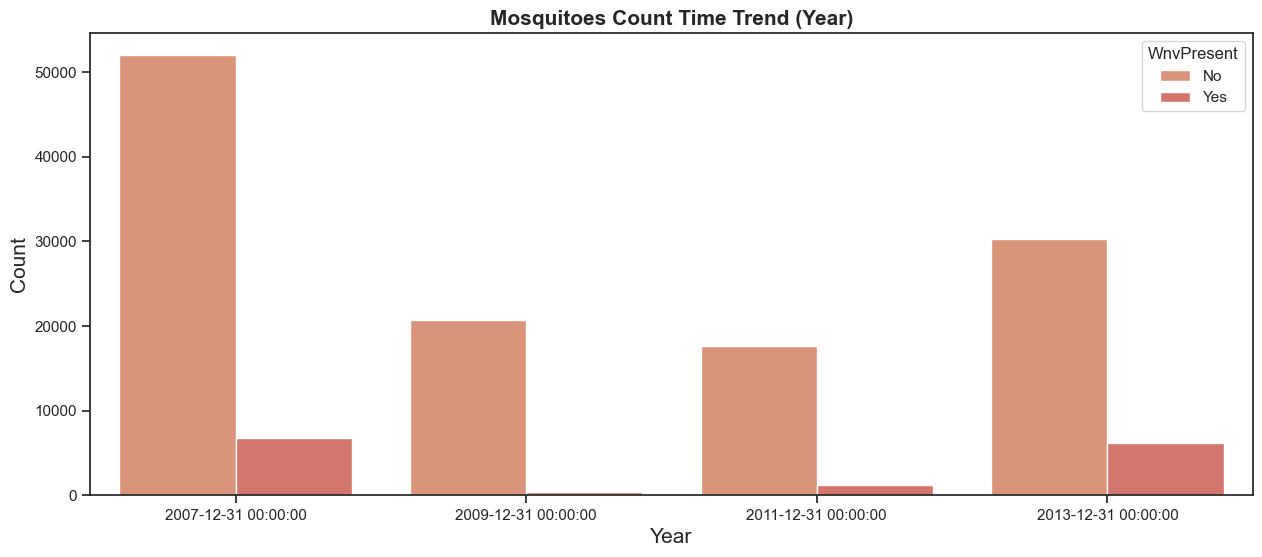

In [ ]:
# Number of mosquitoes time trend (year):
plt.figure(figsize =(15,6))
sns.barplot(data=df_train_year, x=df_train_year.index, y='NumMosquitos', hue='WnvPresent')
plt.title("Mosquitoes Count Time Trend (Year)", fontsize = 15, fontweight='bold')
plt.xlabel("Year",fontsize = 15)
plt.ylabel("Count",fontsize = 15)

- Observe large decrease in mosquito count from 2007 to 2009 even though the spray efforts were from:2011-08-29 to:2013-09-05 
- Spray efforts done in 2011 and 2013, seems rather ineffective

##### Location

In [ ]:
# Top 15 locations with most Mosquitoes:
df_train_top = df_train_final.groupby("Trap").NumMosquitos.sum().sort_values(ascending = False).head(15)
df_train_top

Trap
T115    21668
T900    15386
T138     9936
T002     3710
T128     3315
T135     3122
T103     2988
T008     2668
T212     2595
T158     2575
T903     2327
T114     2161
T225     2014
T151     1969
T009     1940
Name: NumMosquitos, dtype: int64

In [ ]:
# for mosquitoes without West Nile Virus (Wnv)
df_loc_0 = pd.DataFrame(df_train_final_0.groupby("Trap").NumMosquitos.sum())
df_loc_0["Wnv Present"] = "Yes"
df_loc_0.sort_values("NumMosquitos",ascending = False)

,NumMosquitos,Wnv Present
Trap,,
T115,19790,Yes
T900,13326,Yes
T138,9177,Yes
T002,3210,Yes
T128,2833,Yes
T135,2806,Yes
T103,2715,Yes
T212,2500,Yes
T158,2389,Yes


In [ ]:
# for mosquitoes with West Nile Virus (Wnv)
df_loc_1 = pd.DataFrame(df_train_final_1.groupby("Trap").NumMosquitos.sum())
df_loc_1["Wnv Present"] = "No"
df_loc_1.sort_values("NumMosquitos",ascending = False)

,NumMosquitos,Wnv Present
Trap,,
T900,2060,No
T115,1878,No
T138,759,No
T002,500,No
T128,482,No
T003,380,No
T008,330,No
T135,316,No
T013,316,No


In [ ]:
# append both dataframes
df_loc = df_loc_1.append(df_loc_0)
df_loc

,NumMosquitos,Wnv Present
Trap,,
T002,500,No
T003,380,No
T005,17,No
T006,46,No
T008,330,No
...,...,...
T236,365,Yes
T237,18,Yes
T238,34,Yes


In [ ]:
# filter out to top 15 locations with most mosquitoes
df_loc_filter = df_loc.loc[['T115', 'T900', 'T138', 'T002', 'T128', 'T135', 'T103', 'T008', 'T212',
       'T158', 'T903', 'T114', 'T225', 'T151', 'T009'],:]

Text(0.5, 1.0, 'Overall Mosquito Count for Top 15 locations')

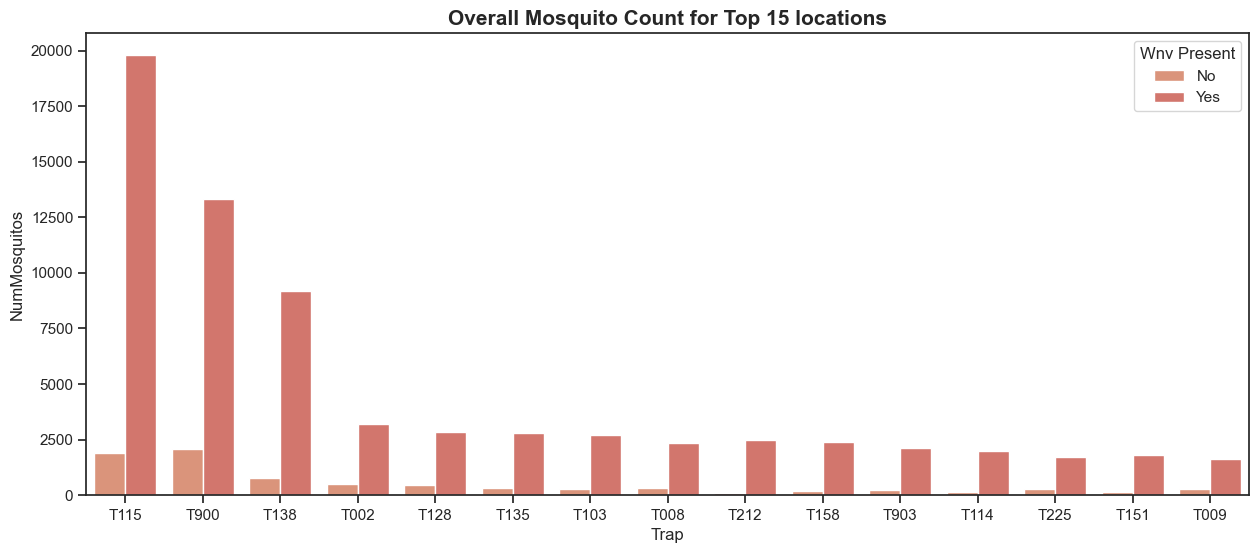

In [ ]:
# Mosquito counts with/without WNV for locations in top 15 
plt.figure(figsize =(15,6))
sns.barplot(data=df_loc_filter, x=df_loc_filter.index, y='NumMosquitos', hue='Wnv Present')
plt.title("Overall Mosquito Count for Top 15 locations", fontsize = 15, fontweight='bold')

Top 5 locations with most overall mosquitoes over the years include 
- T115 (1200 S DOTY AVE, Chicago, IL) 
- T900 (1000 W OHARE AIRPORT, Chicago, IL)
- T138 (1000 S STONY ISLAND AVE, Chicago, IL)
- T002 (4100 N OAK PARK AVE, Chicago, IL)
- T128 (2400 E 105TH ST, Chicago, IL)

Yanda - find location on map

##### Location by year

In [ ]:
# group data by year and trap
df_train_grp = df_train_final.groupby([df_train_final.index.year,"Trap"]).agg(
    NumMosquitos = ("NumMosquitos", "sum"),
    WnvPresent = ("WnvPresent","mean"))

# group data by year
df_train_grp_year = df_train_final.groupby([df_train_final.index.year]).agg(
    NumMosquitos = ("NumMosquitos", "sum"),
    WnvPresent = ("WnvPresent","mean"))

display(df_train_grp)
display(df_train_grp_year)

NumMosquitos  WnvPresent
Date Trap                          
2007 T001            25    0.000000
     T002           740    0.163265
     T003           214    0.133333
     T004            59    0.000000
     T005            50    0.142857
...                 ...         ...
2013 T233           665    0.205882
     T235           395    0.225806
     T236           358    0.037037
     T900          5689    0.193277
     T903           194    0.000000

[343 rows x 2 columns]

,NumMosquitos,WnvPresent
Date,,
2007,58688,0.061926
2009,21108,0.008448
2011,18799,0.027751
2013,36444,0.099916


In [ ]:
# reset index
df_train_grp = df_train_grp.reset_index()

In [ ]:
df_train_plot = df_train_grp[(df_train_grp["Trap"] == 'T115') | (df_train_grp["Trap"] == 'T900') | (df_train_grp["Trap"] == 'T138') | (df_train_grp["Trap"] == 'T002') | (df_train_grp["Trap"] == 'T128')]

In [ ]:
df_train_plot

,Date,Trap,NumMosquitos,WnvPresent
1,2007,T002,740,0.163265
80,2007,T115,19134,0.088235
81,2007,T128,2532,0.132353
84,2007,T138,9321,0.068966
116,2009,T002,818,0.021739
157,2009,T115,529,0.000000
158,2009,T128,72,0.000000
160,2009,T138,94,0.000000
187,2009,T900,5488,0.007326
189,2011,T002,360,0.033333


Text(0.5, 1.0, 'Total No. of Mosquitos Captured by Year')

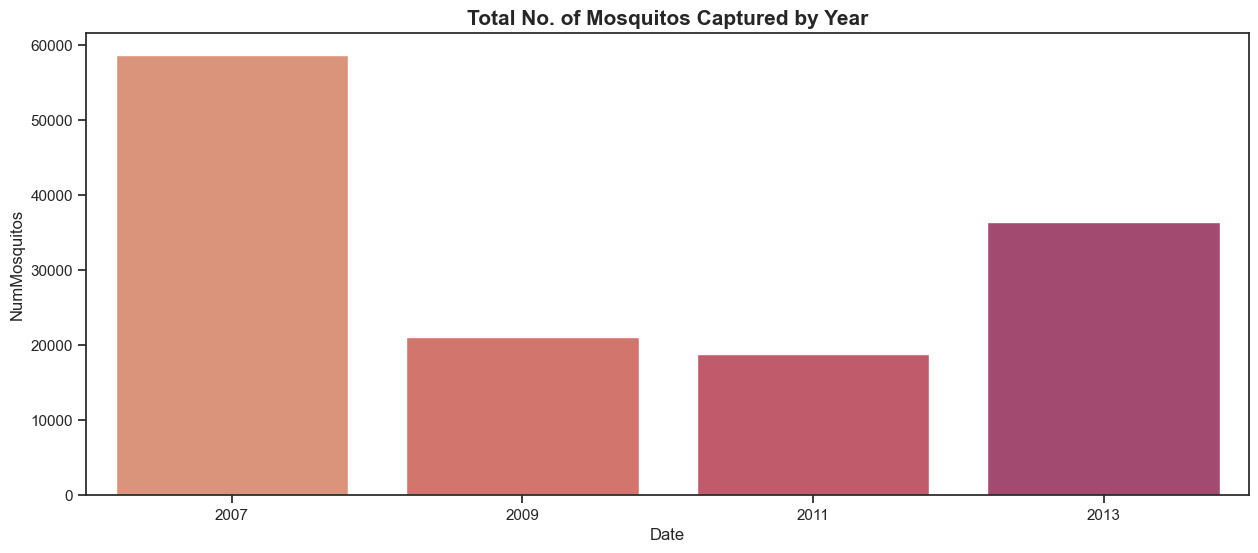

In [ ]:
plt.figure(figsize =(15,6))
sns.barplot(data = df_train_grp_year, x = df_train_grp_year.index, y='NumMosquitos')
plt.title("Total No. of Mosquitos Captured by Year", fontsize = 15, fontweight='bold')

- Observe that the spray efforts in 2011 and 2013 did not have a significant impact in reducing the mosquito counts for year 2011 to 2013. An increase in mosquitoes were observed, from 20,000 to ~40,000

Text(0.5, 1.0, '5 Traps with Most Overall Number of Mosquitos (by Year)')

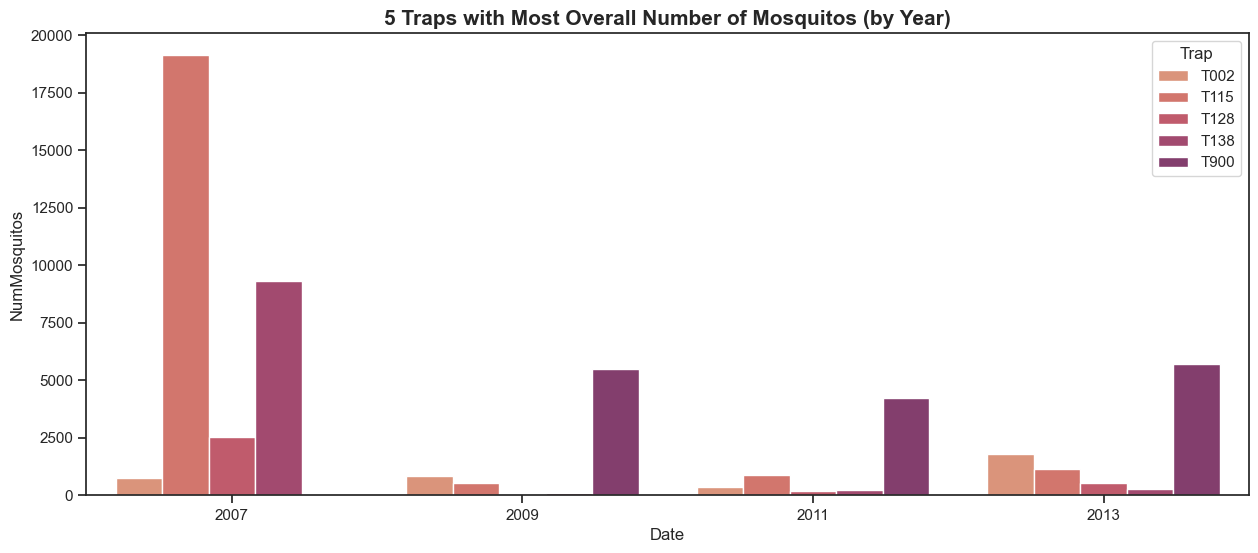

In [ ]:
plt.figure(figsize =(15,6))
sns.barplot(data=df_train_plot, x="Date", y='NumMosquitos', hue='Trap')
plt.title("5 Traps with Most Overall Number of Mosquitos (by Year)", fontsize = 15, fontweight='bold')

- Observe that the spray efforts in 2011 and 2013 did not have a significant impact in reducing the mosquito counts for T900 trap, which had a relatively similar mosquito count of ~4000 to ~6000 from 2009 to 2013.
- Observe large decrease in mosquito count from 2007 to 2009 even though the spray efforts were in 2011 and 2013.

### Dataset: `spray.csv`

In [ ]:
df_spray.head()

,Date,Time,Latitude,Longitude,Year,Month,Week,DayOfWeek
datetime,,,,,,,,
2011-08-29 18:56:58,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011,8,35,0
2011-08-29 18:57:08,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011,8,35,0
2011-08-29 18:57:18,2011-08-29,6:57:18 PM,42.391022,-88.089157,2011,8,35,0
2011-08-29 18:57:28,2011-08-29,6:57:28 PM,42.390637,-88.089158,2011,8,35,0
2011-08-29 18:57:38,2011-08-29,6:57:38 PM,42.390410,-88.088858,2011,8,35,0


In [ ]:
# hist
df_spray_day = df_spray.resample("D").count()
df_spray_day

,Date,Time,Latitude,Longitude,Year,Month,Week,DayOfWeek
datetime,,,,,,,,
2011-08-29,95,95,95,95,95,95,95,95
2011-08-30,0,0,0,0,0,0,0,0
2011-08-31,0,0,0,0,0,0,0,0
2011-09-01,0,0,0,0,0,0,0,0
2011-09-02,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2013-09-01,0,0,0,0,0,0,0,0
2013-09-02,0,0,0,0,0,0,0,0
2013-09-03,0,0,0,0,0,0,0,0


In [ ]:
df_spray_month = df_spray_day.resample("M").count()
df_spray_month

,Date,Time,Latitude,Longitude,Year,Month,Week,DayOfWeek
datetime,,,,,,,,
2011-08-31,3,3,3,3,3,3,3,3
2011-09-30,30,30,30,30,30,30,30,30
2011-10-31,31,31,31,31,31,31,31,31
2011-11-30,30,30,30,30,30,30,30,30
2011-12-31,31,31,31,31,31,31,31,31
2012-01-31,31,31,31,31,31,31,31,31
2012-02-29,29,29,29,29,29,29,29,29
2012-03-31,31,31,31,31,31,31,31,31
2012-04-30,30,30,30,30,30,30,30,30


### Dataset: `weather.csv`

#### Temperature delta between stations

In [ ]:
# cal delta between Temperature readings for station 1 and station 2
df_weather_1["Tmax_delta"] = df_weather_1["Tmax"]-df_weather_2["Tmax"]
df_weather_1["Tmin_delta"] = df_weather_1["Tmin"]-df_weather_2["Tmin"]
df_weather_1["Tavg_delta"] = df_weather_1["Tavg"]-df_weather_2["Tavg"]

<AxesSubplot: title={'center': 'Tavg Delta Between Station 1 & 2'}, xlabel='Year', ylabel='Tmin_delta'>

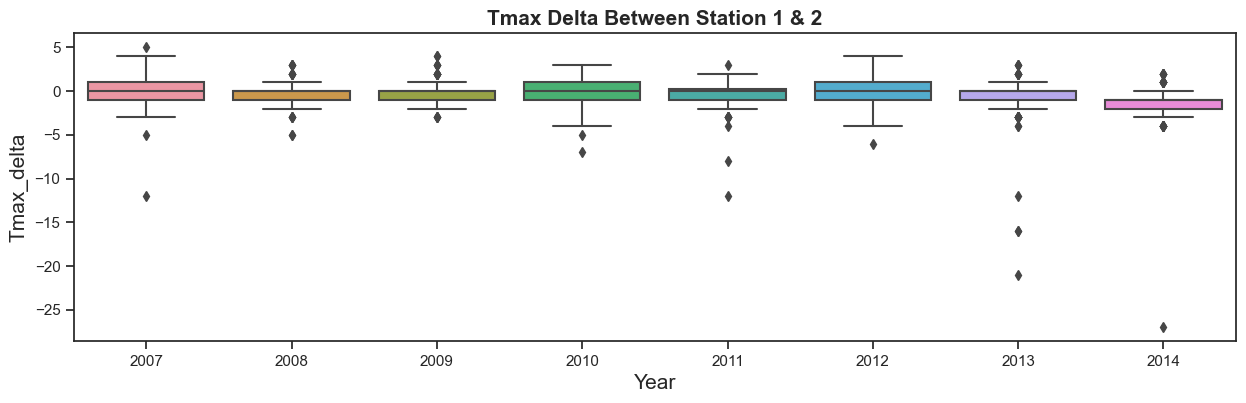

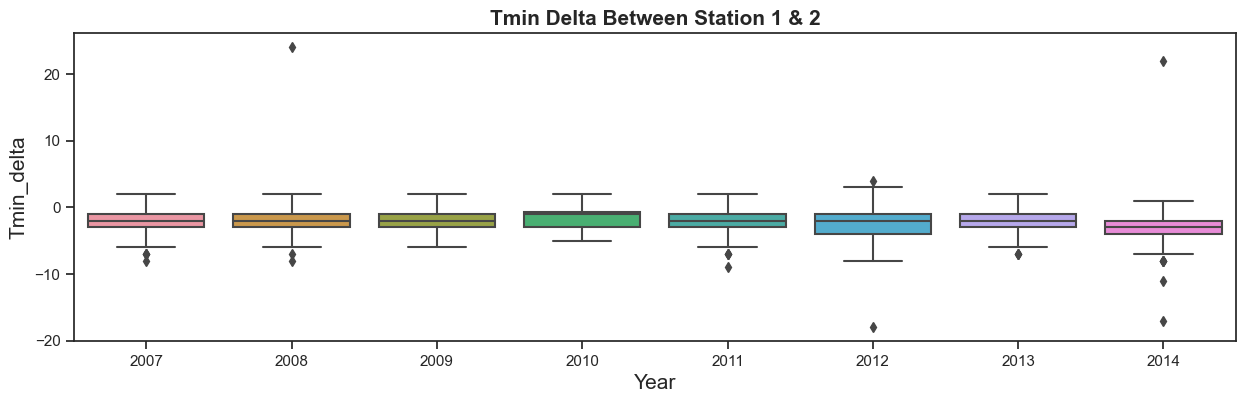

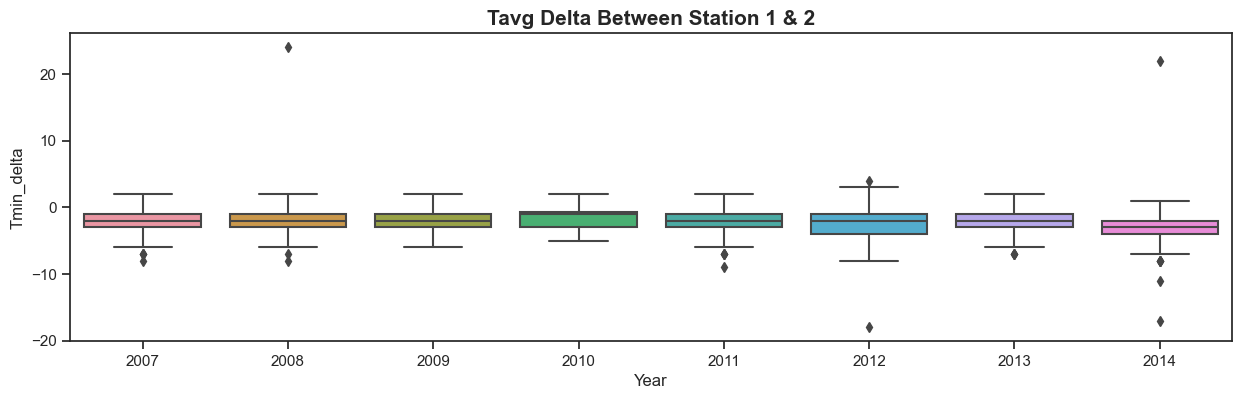

In [ ]:
plt.figure(figsize=(15,4))
plt.title("Tmax Delta Between Station 1 & 2", fontsize = 15, fontweight='bold')
plt.xlabel("Year",fontsize = 15)
plt.ylabel("Max Temperature Delta", fontsize = 15)
sns.boxplot(x ='Year' , y = 'Tmax_delta', data = df_weather_1)

plt.figure(figsize=(15,4))
plt.title("Tmin Delta Between Station 1 & 2", fontsize = 15, fontweight='bold')
plt.xlabel("Year",fontsize = 15)
plt.ylabel("Min Temperature Delta", fontsize = 15)
sns.boxplot(x ='Year' , y = 'Tmin_delta', data = df_weather_1)

plt.figure(figsize=(15,4))
plt.title("Tavg Delta Between Station 1 & 2", fontsize = 15, fontweight='bold')
plt.ylabel("Avg Temperature Delta")
plt.xlabel("Time")
sns.boxplot(x ='Year' , y = 'Tmin_delta', data = df_weather_1)

- delta average temperature (Fahrenheit) is in the range of 5 to 10 (absolute value). delta of 10 degF = ~5.5 degC delta. 
- formula: Δ°C x 9/5= Δ°F
- boxplots showed that no significant differences between Stations 1 & 2 --> readings from both stations are similar

##### Time Trend

In [ ]:
# Time period available
for i in range(2007,2014,2):
    print(f'{i} min : {df_merged[df_merged["Date"].dt.year == i]["Date"].min()}'
         f'{i} max : {df_merged[df_merged["Date"].dt.year == i]["Date"].max()}')

2007 min : 2007-05-29 00:00:002007 max : 2007-10-09 00:00:00
2009 min : 2009-05-28 00:00:002009 max : 2009-10-01 00:00:00
2011 min : 2011-06-10 00:00:002011 max : 2011-09-30 00:00:00
2013 min : 2013-06-07 00:00:002013 max : 2013-09-26 00:00:00


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 0 to 10505
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Date               10506 non-null  datetime64[ns] 
 1   Species            10506 non-null  object         
 2   Trap               10506 non-null  object         
 3   Latitude           10506 non-null  float64        
 4   Longitude          10506 non-null  float64        
 5   AddressAccuracy    10506 non-null  int64          
 6   NumMosquitos       10506 non-null  int64          
 7   WnvPresent         10506 non-null  int64          
 8   Year               10506 non-null  int64          
 9   Month              10506 non-null  int64          
 10  Week               10506 non-null  int64          
 11  DayOfWeek          10506 non-null  int64          
 12  Station            10506 non-null  float64        
 13  Tmax               10506 non-null  float64    

<AxesSubplot: xlabel='Week', ylabel='Humidity'>

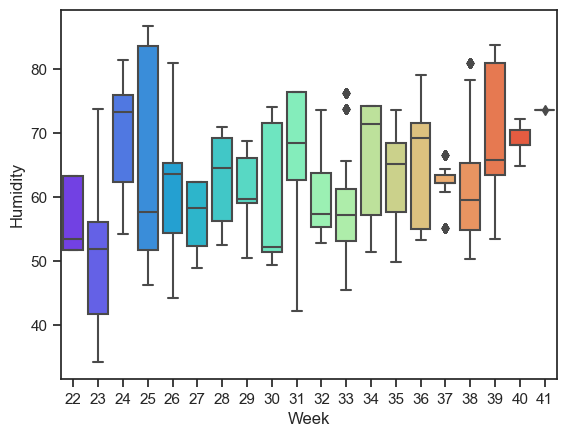

In [ ]:
df_merged.Humidity
sns.boxplot(data=df_merged, x='Week', y=df_merged.Humidity, palette="rainbow")

In [ ]:

def twin_plot(fea1, fea2):
    for x in train_weather['year'].unique():
        fig, ax1 = plt.subplots(figsize=(12,6))

        sns.barplot(x=train_weather[train_weather['year']==x]['date'], y=train_weather[train_weather['year']==x][fea1],
                     ci=None, color='#8383EC', label=f'{fea1}', ax=ax1)
        ax1.set_xlabel('date', fontsize=13)
        ax1.set_ylabel(f'{fea1}', fontsize=13, color='#8383EC')
        ax1.legend(loc=2)
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);

        new = train_weather[train_weather['year']==x].groupby(['date'])[fea2].sum()
        df_new = pd.DataFrame(new)

        ax2 = ax1.twinx()
        sns.lineplot(x=df_new.index, y=df_new[fea2],
                     ci=None, color='r', label=f'{fea2}', ax=ax2)
        ax2.set_ylabel(f'{fea2}', fontsize=13, color='r')
        ax2.legend(loc=1)

        plt.title(f'{fea1} and {fea2} in {x}')

        fig.tight_layout()

In [ ]:
df_merged[df_merged['Year']==2007].groupby('WnvPresent')['DewPoint']

In [ ]:
df_merged_wnv = df_merged[df_merged['WnvPresent']==1]

In [ ]:
df_merged_wnv

,index,Date,Species,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Year,Month,Week,DayOfWeek,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Sunrise_1,Sunset_1,daylight_duration,Humidity
553,553,2007-07-18,CULEX PIPIENS/RESTUANS,T215,41.686398,-87.531635,8,50,1,2007,7,29,2,2.0,84.0,67.0,76.0,4.0,65.0,69.0,0.0,11.0,0422,1930,TSRA RA HZ FU,0.66,29.23,29.88,3.1,25.0,8.8,1900-01-01 04:22:00,1900-01-01 19:30:00,0 days 15:08:00,68.77
603,603,2007-07-25,CULEX PIPIENS/RESTUANS,T115,41.673408,-87.599862,5,50,1,2007,7,30,2,2.0,77.0,63.0,70.0,-3.0,51.0,59.0,0.0,5.0,0426,1928,Clear,0.00,29.28,29.92,9.1,30.0,11.2,1900-01-01 04:26:00,1900-01-01 19:28:00,0 days 15:02:00,50.92
611,611,2007-07-25,CULEX PIPIENS/RESTUANS,T115,41.673408,-87.599862,5,50,1,2007,7,30,2,2.0,77.0,63.0,70.0,-3.0,51.0,59.0,0.0,5.0,0426,1928,Clear,0.00,29.28,29.92,9.1,30.0,11.2,1900-01-01 04:26:00,1900-01-01 19:28:00,0 days 15:02:00,50.92
618,618,2007-07-25,CULEX PIPIENS,T115,41.673408,-87.599862,5,50,1,2007,7,30,2,2.0,77.0,63.0,70.0,-3.0,51.0,59.0,0.0,5.0,0426,1928,Clear,0.00,29.28,29.92,9.1,30.0,11.2,1900-01-01 04:26:00,1900-01-01 19:28:00,0 days 15:02:00,50.92
660,660,2007-07-25,CULEX PIPIENS,T115,41.673408,-87.599862,5,50,1,2007,7,30,2,2.0,77.0,63.0,70.0,-3.0,51.0,59.0,0.0,5.0,0426,1928,Clear,0.00,29.28,29.92,9.1,30.0,11.2,1900-01-01 04:26:00,1900-01-01 19:28:00,0 days 15:02:00,50.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10405,10405,2013-09-19,CULEX PIPIENS,T221,41.659112,-87.538693,8,11,1,2013,9,38,3,2.0,74.0,65.0,70.0,3.0,53.0,60.0,0.0,5.0,0521,1821,Clear,0.00,29.55,30.19,9.2,6.0,9.9,1900-01-01 05:21:00,1900-01-01 18:21:00,0 days 13:00:00,54.81
10427,10427,2013-09-26,CULEX PIPIENS,T003,41.964242,-87.757639,8,3,1,2013,9,39,3,1.0,82.0,62.0,72.0,7.0,59.0,64.0,0.0,7.0,0528,1809,RA,0.00,29.28,29.98,7.0,35.0,9.4,1900-01-01 05:28:00,1900-01-01 18:09:00,0 days 12:41:00,63.64
10436,10436,2013-09-26,CULEX PIPIENS/RESTUANS,T900,41.974689,-87.890615,9,39,1,2013,9,39,3,1.0,82.0,62.0,72.0,7.0,59.0,64.0,0.0,7.0,0528,1809,RA,0.00,29.28,29.98,7.0,35.0,9.4,1900-01-01 05:28:00,1900-01-01 18:09:00,0 days 12:41:00,63.64
10480,10480,2013-09-26,CULEX PIPIENS/RESTUANS,T155,41.776156,-87.778927,9,4,1,2013,9,39,3,2.0,83.0,63.0,73.0,8.0,58.0,64.0,0.0,8.0,0528,1809,Clear,0.06,29.34,29.97,6.8,34.0,9.8,1900-01-01 05:28:00,1900-01-01 18:09:00,0 days 12:41:00,59.36


In [ ]:
def rs_plot(var1, var2):
    for year in df_merged_wnv['Year'].unique():
        fig, ax1 = plt.subplots(figsize=(12,4))

        sns.barplot(x=df_merged_wnv[df_merged_wnv['Year']==year][var1], y=df_merged_wnv[df_merged_wnv['Year']==year][var2],
                     ci=None, color='#8383EC', label=f'{var1}', ax=ax1)
        # ax1.set_xlabel('date', fontsize=13)
        # ax1.set_ylabel(f'{fea1}', fontsize=13, color='#8383EC')
        # ax1.legend(loc=2)
        # ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);
        
        plt.title(f'Number of Infected Mosquitos by {var1} for Year {year}', fontweight='bold')

        fig.tight_layout()

In [ ]:
df_merged_wnv.groupby("DewPoint")["WnvPresent"].sum()

DewPoint
44.0     3
48.0     2
50.0    13
51.0     5
52.0    17
53.0    29
54.0    37
55.0    44
56.0    24
57.0    17
58.0    19
59.0     9
60.0    33
61.0    20
62.0    32
63.0    14
64.0    17
65.0    15
66.0    25
67.0     8
68.0    22
69.0    33
70.0    24
71.0     8
72.0    49
73.0    32
Name: WnvPresent, dtype: int64

In [ ]:
df_merged_wnv[df_merged_wnv['Year']==2009]["WnvPresent"]

4890    1
4951    1
5005    1
5006    1
5192    1
5357    1
5392    1
5446    1
5462    1
5470    1
5482    1
5483    1
5516    1
5517    1
5588    1
5686    1
5688    1
5698    1
5902    1
Name: WnvPresent, dtype: int64

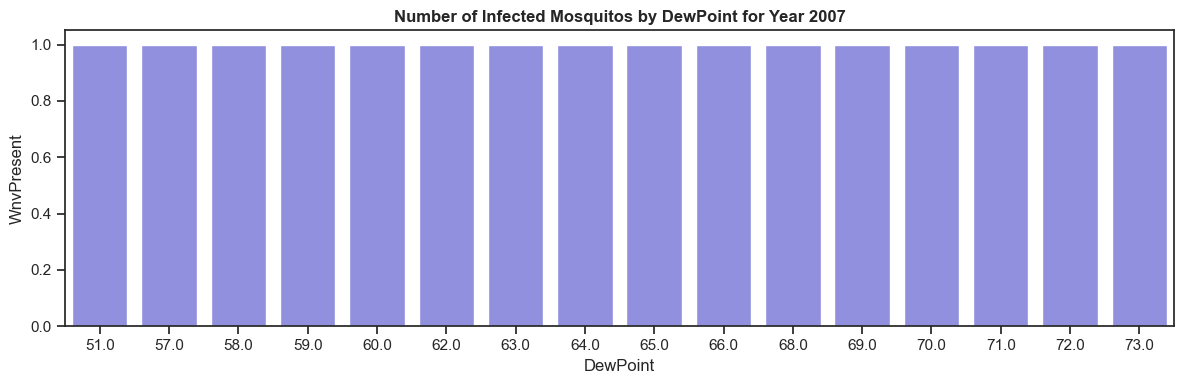

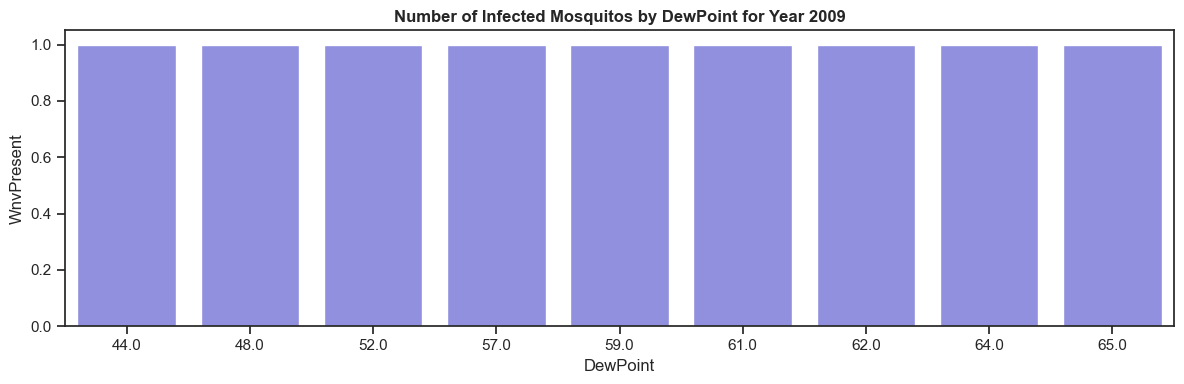

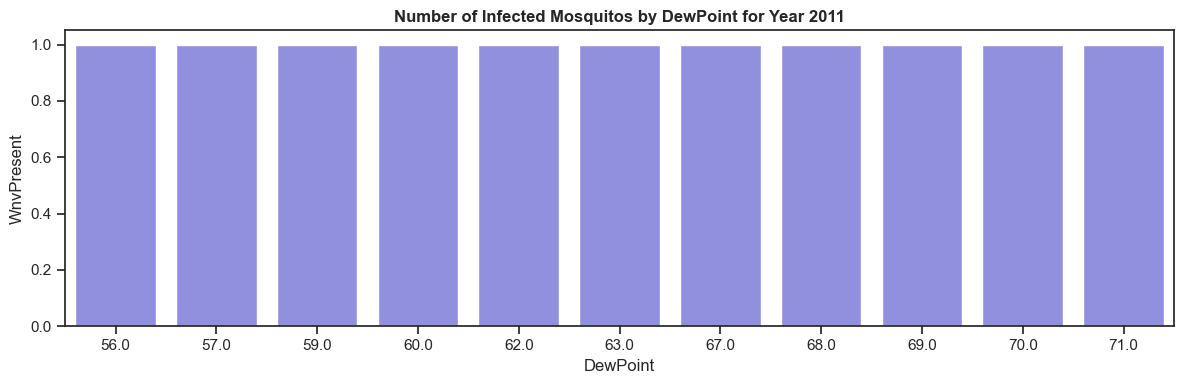

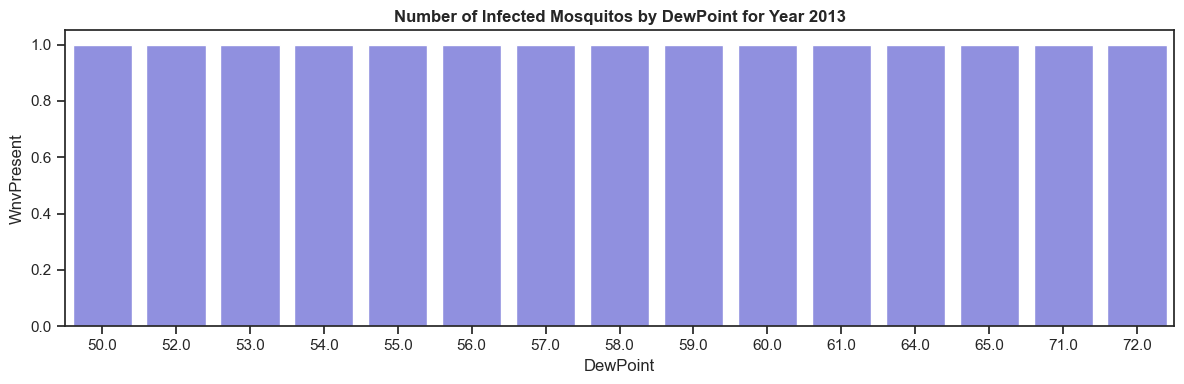

In [ ]:
rs_plot("DewPoint", "WnvPresent")

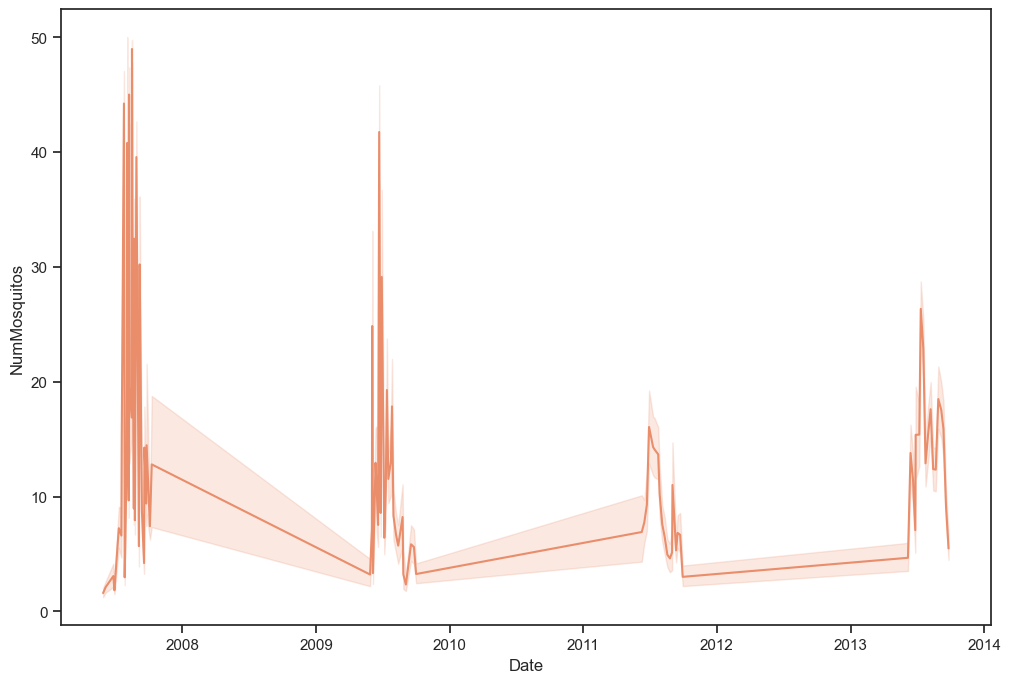

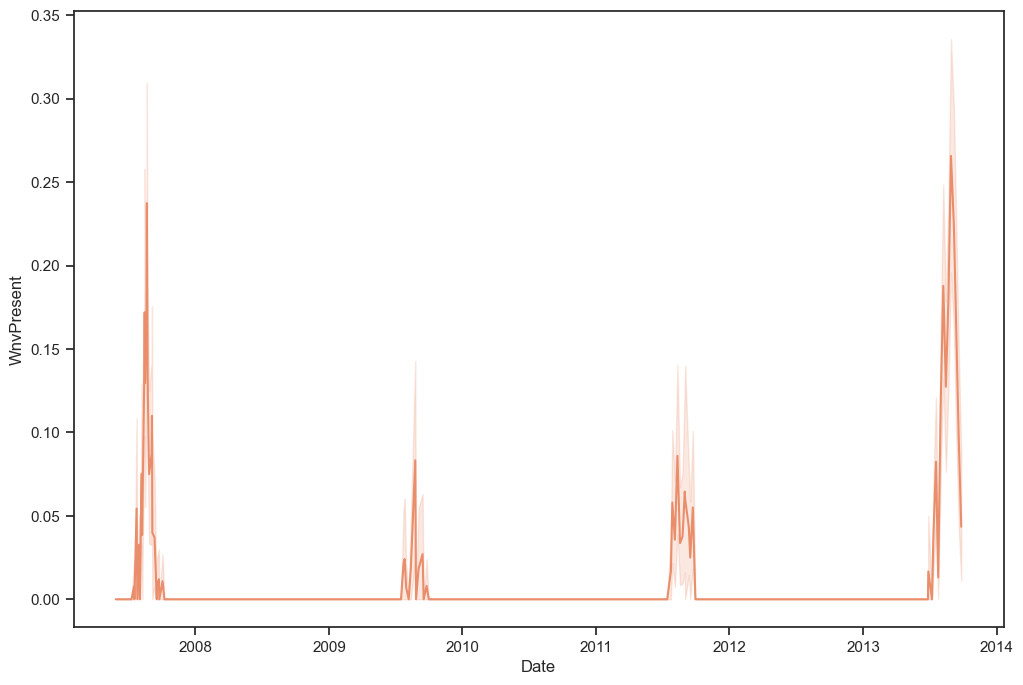

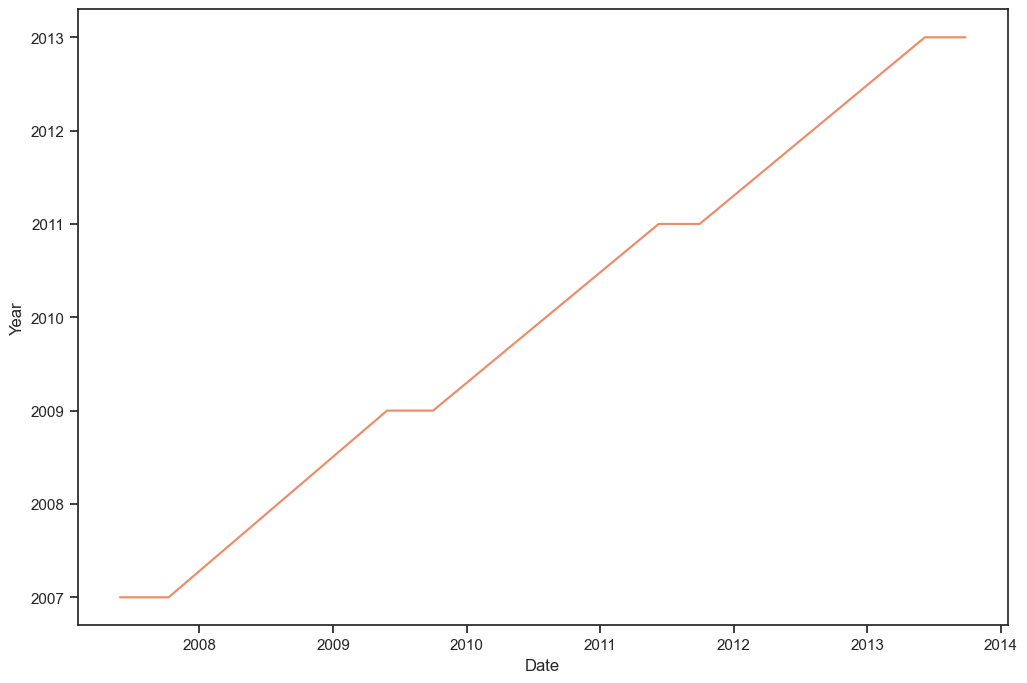

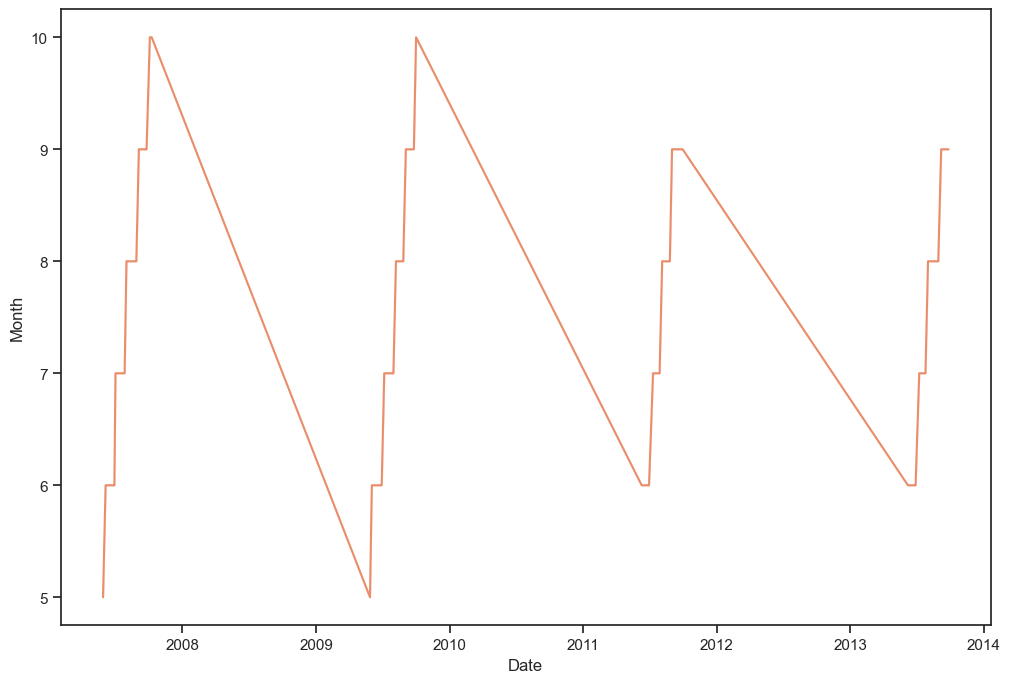

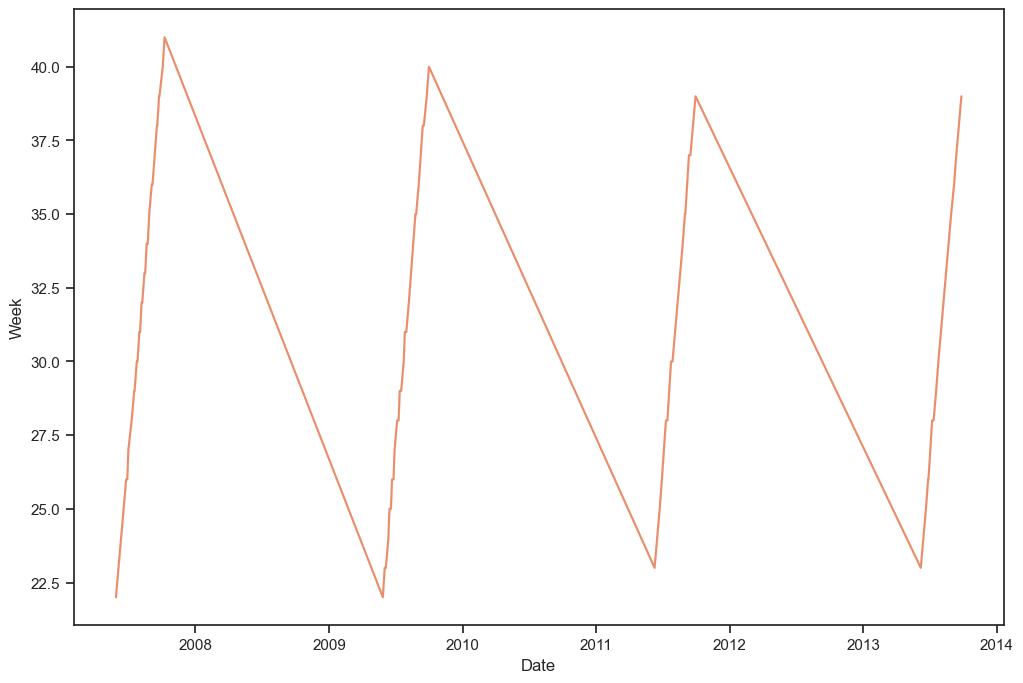

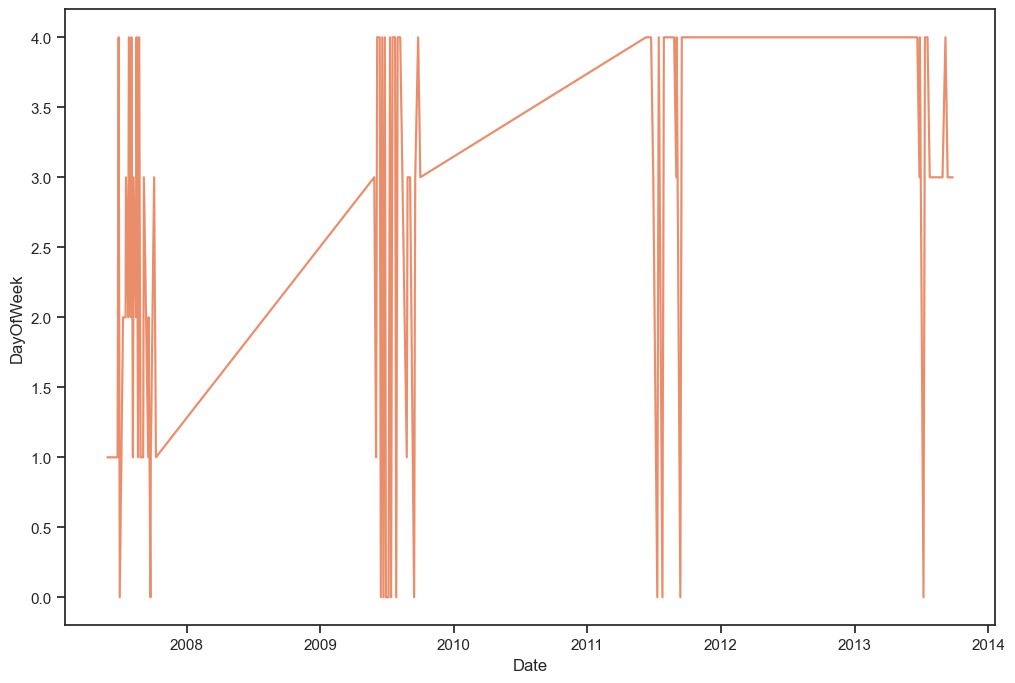

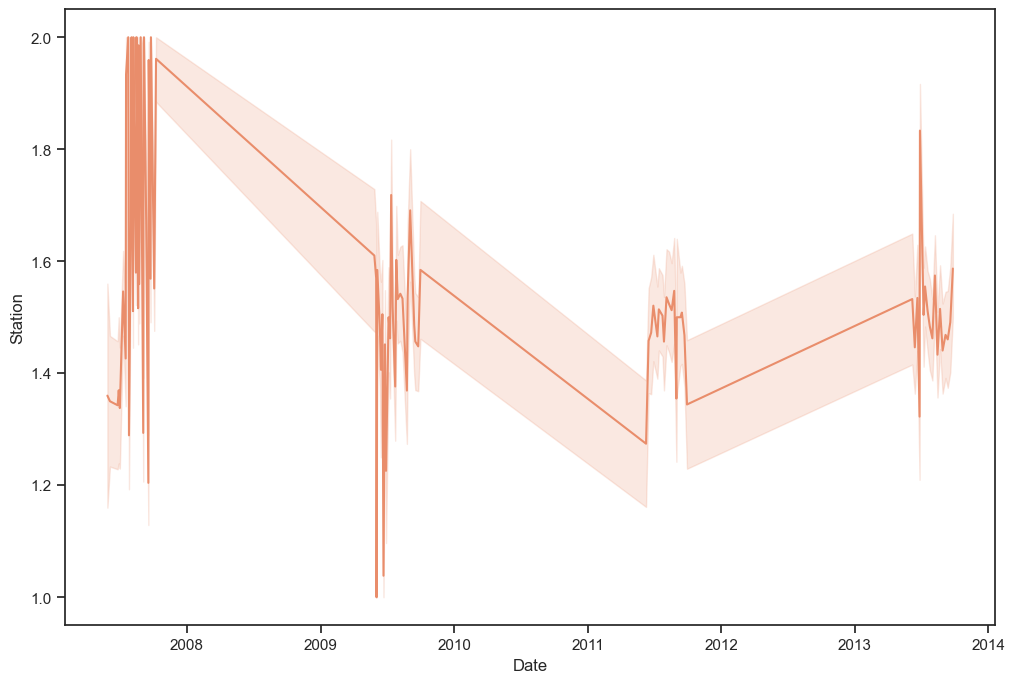

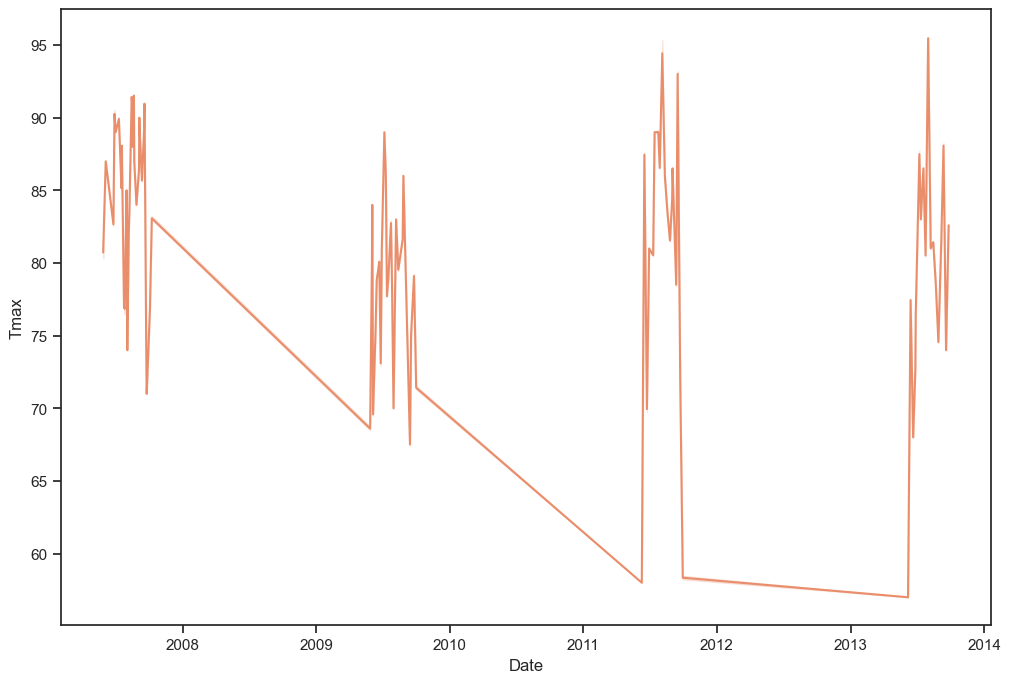

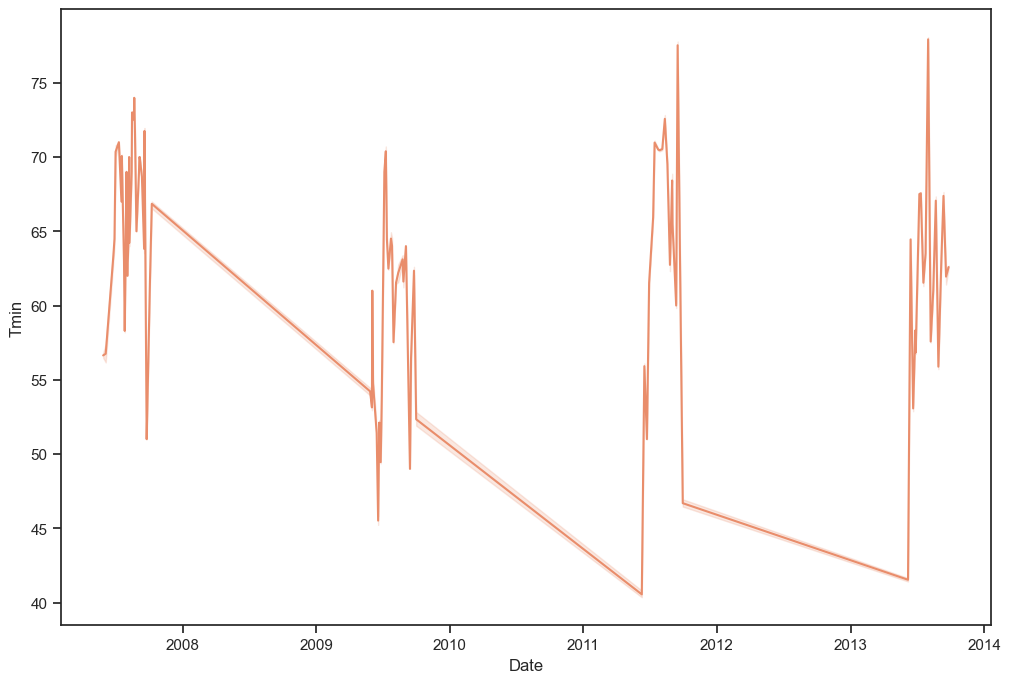

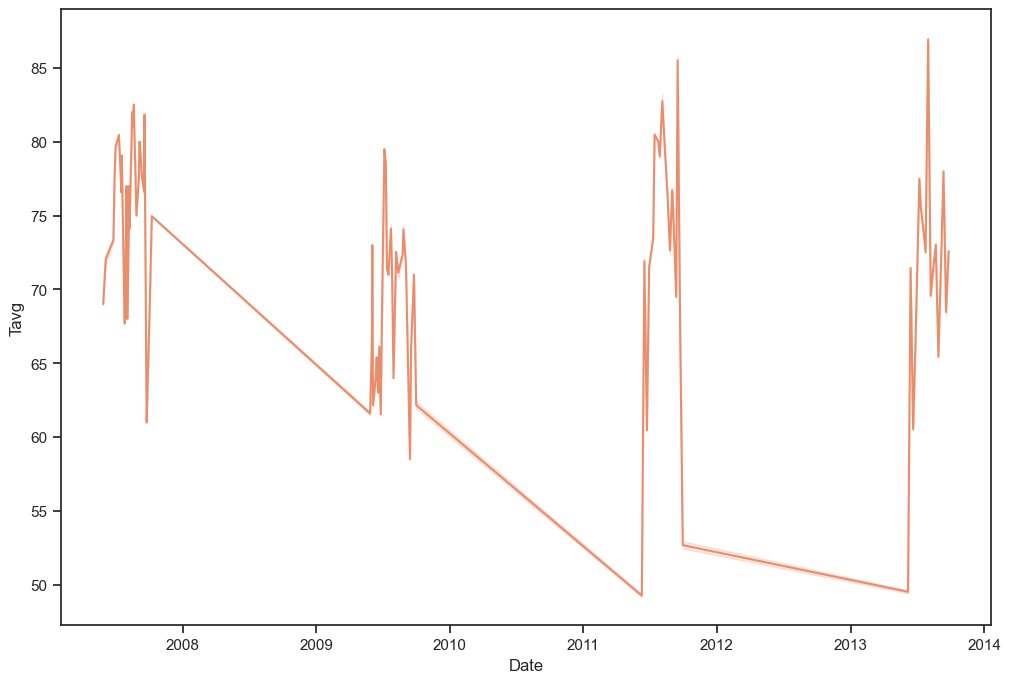

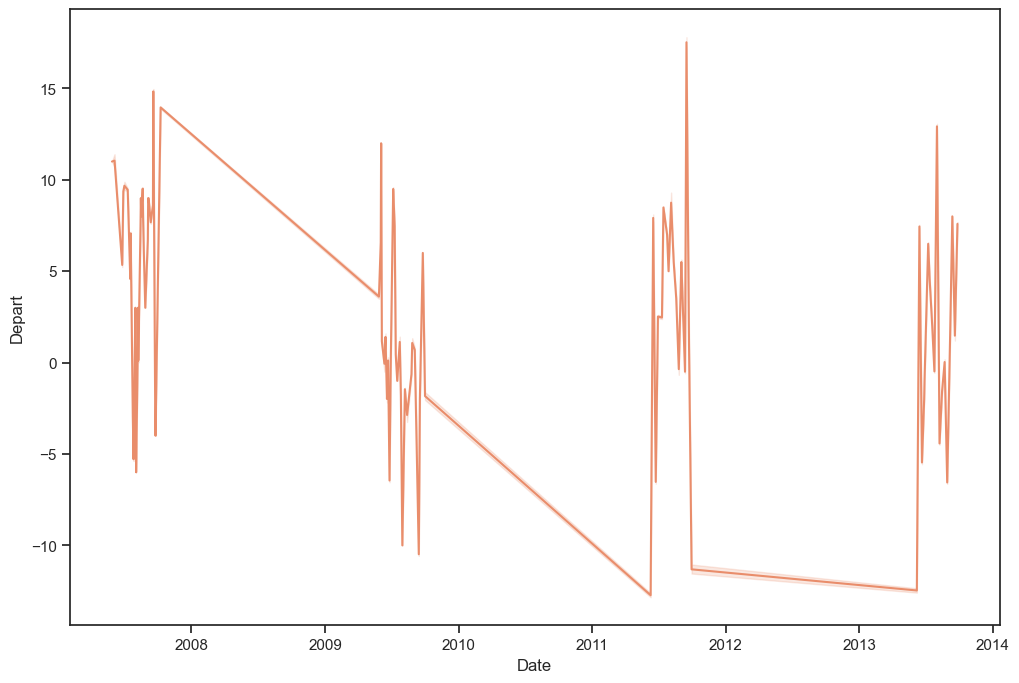

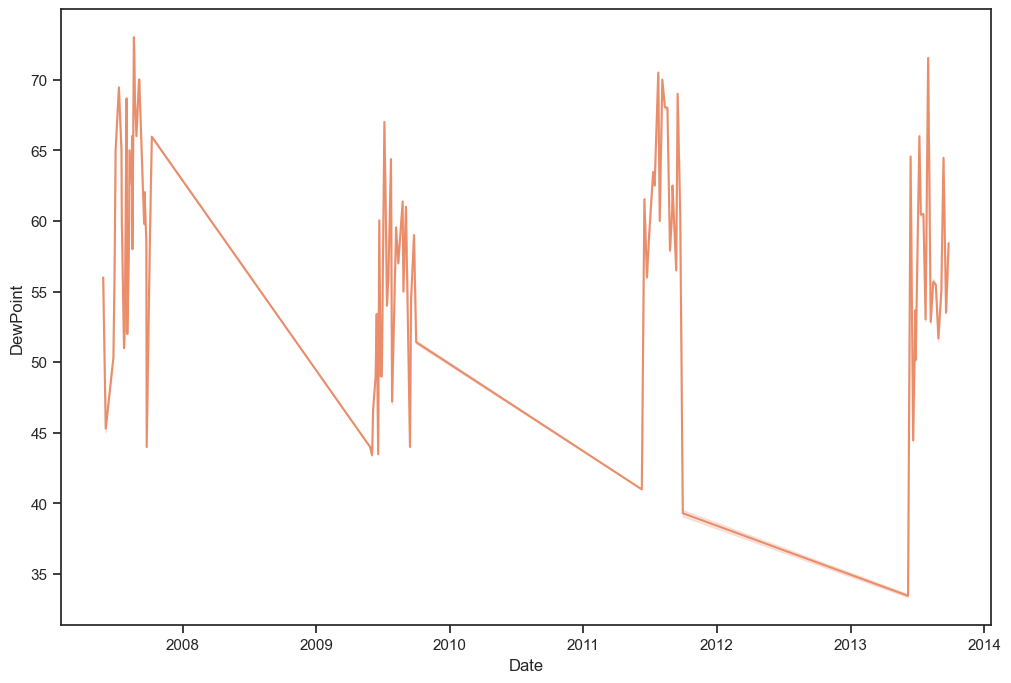

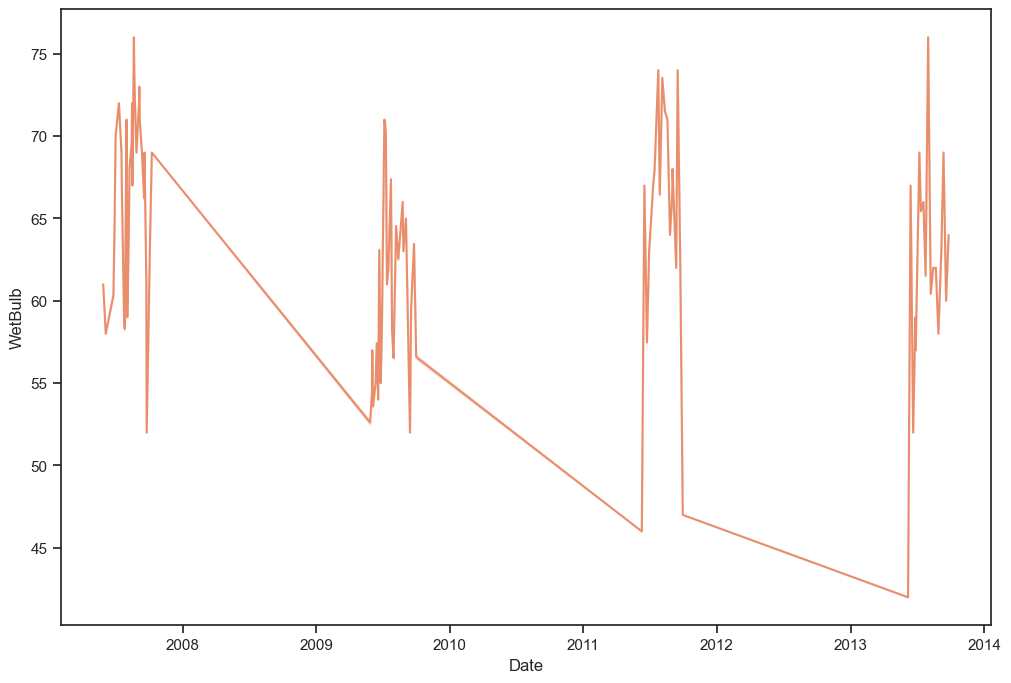

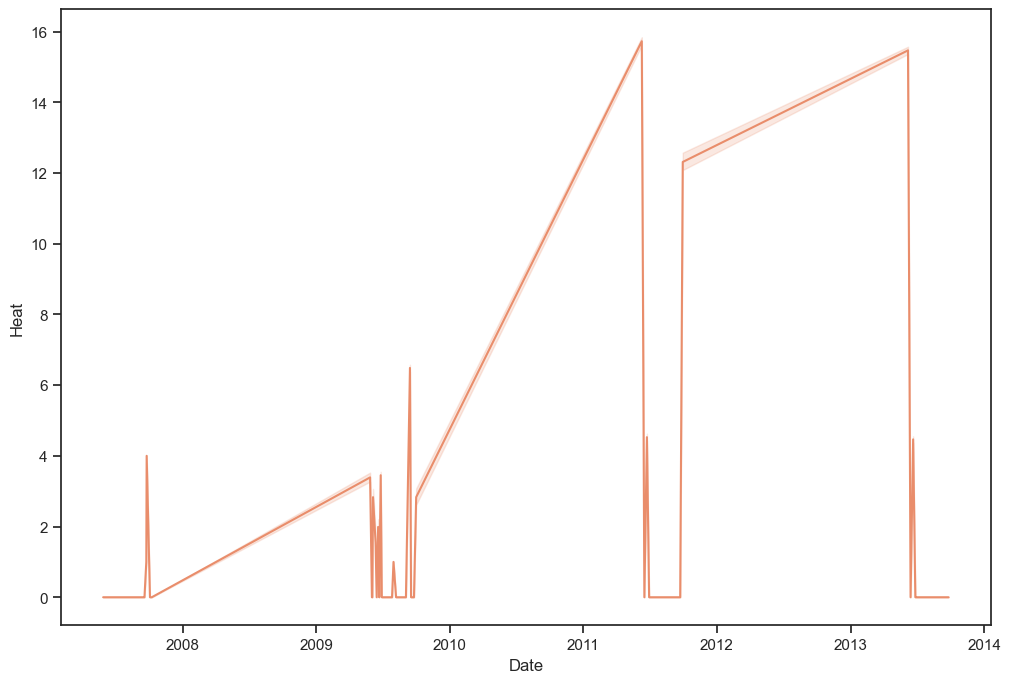

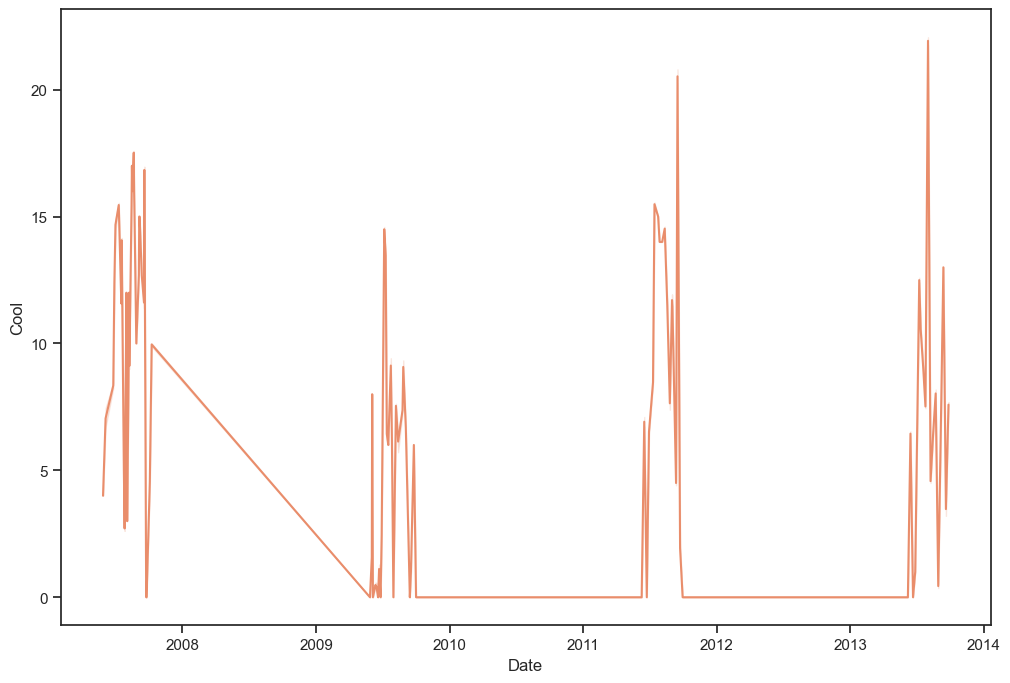

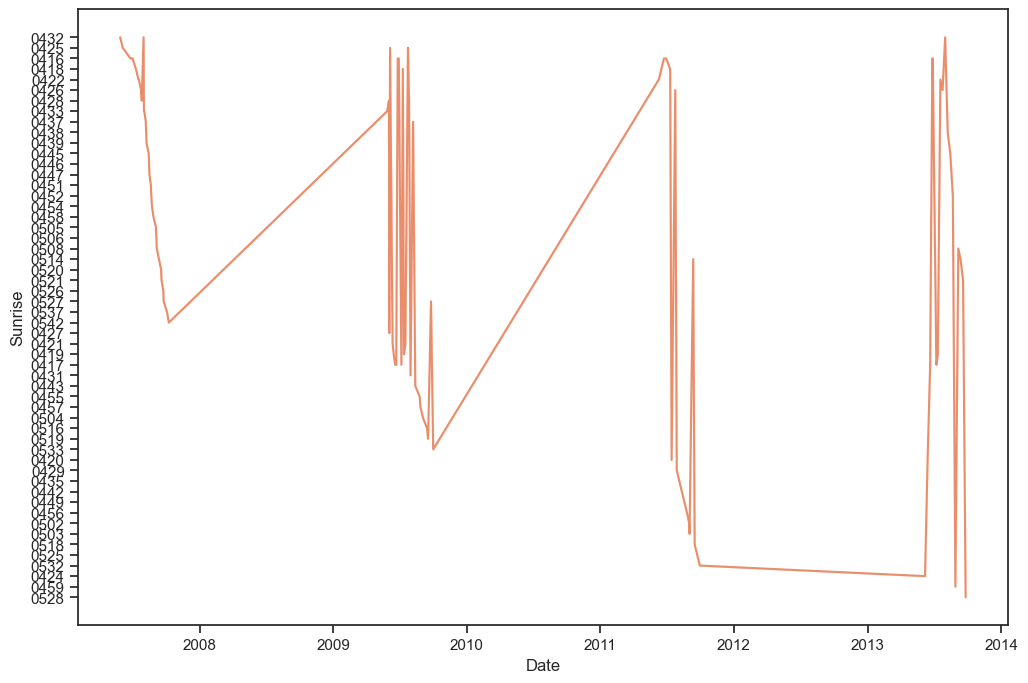

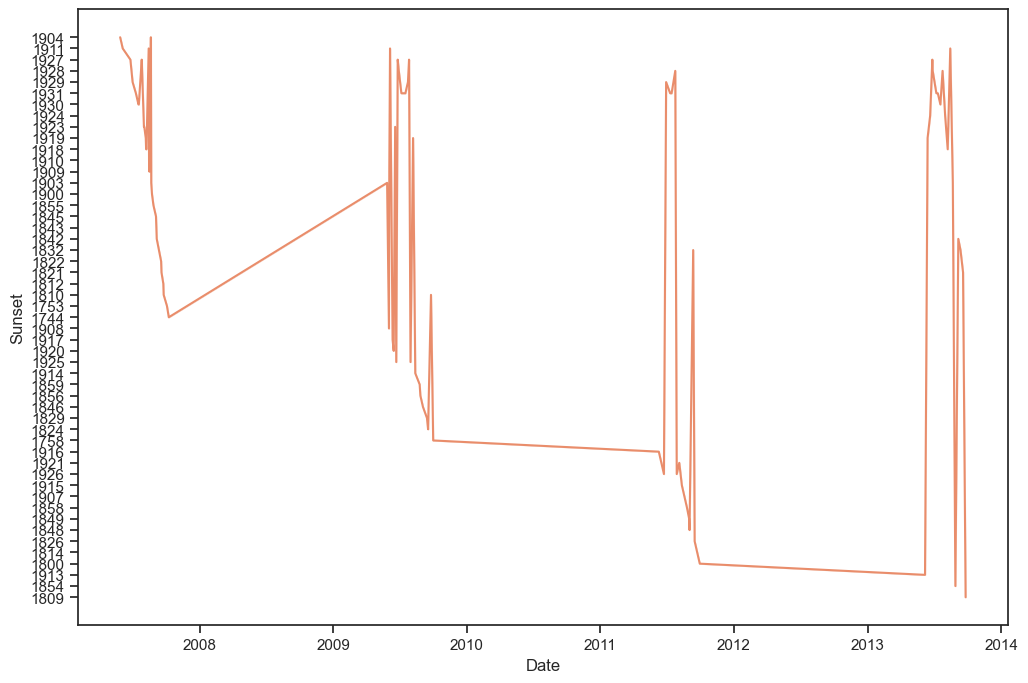

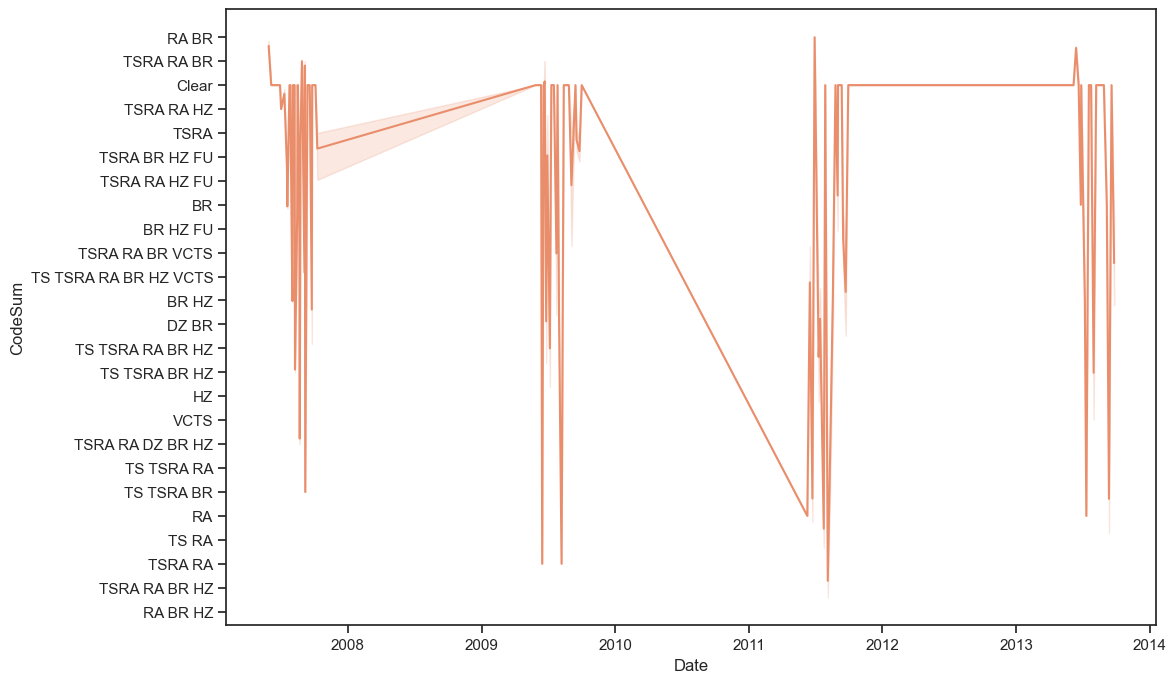

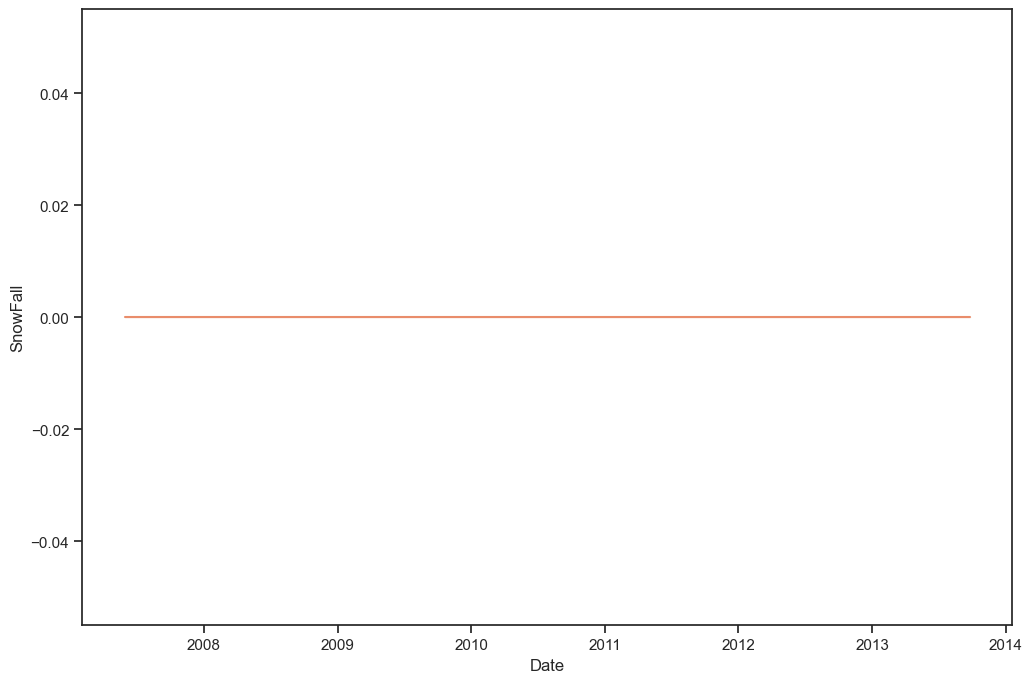

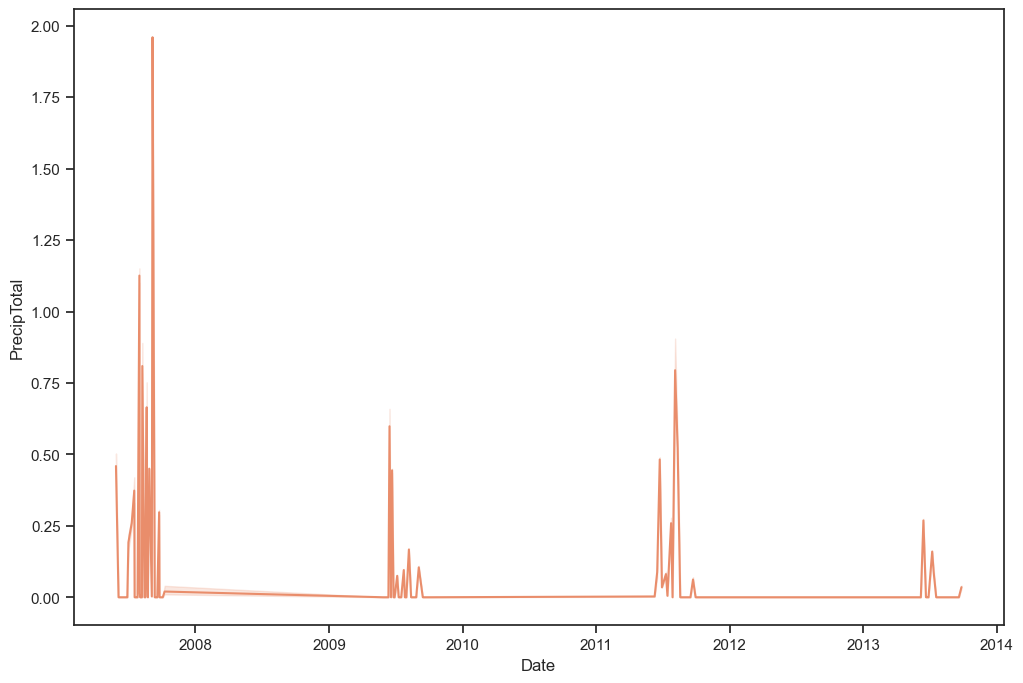

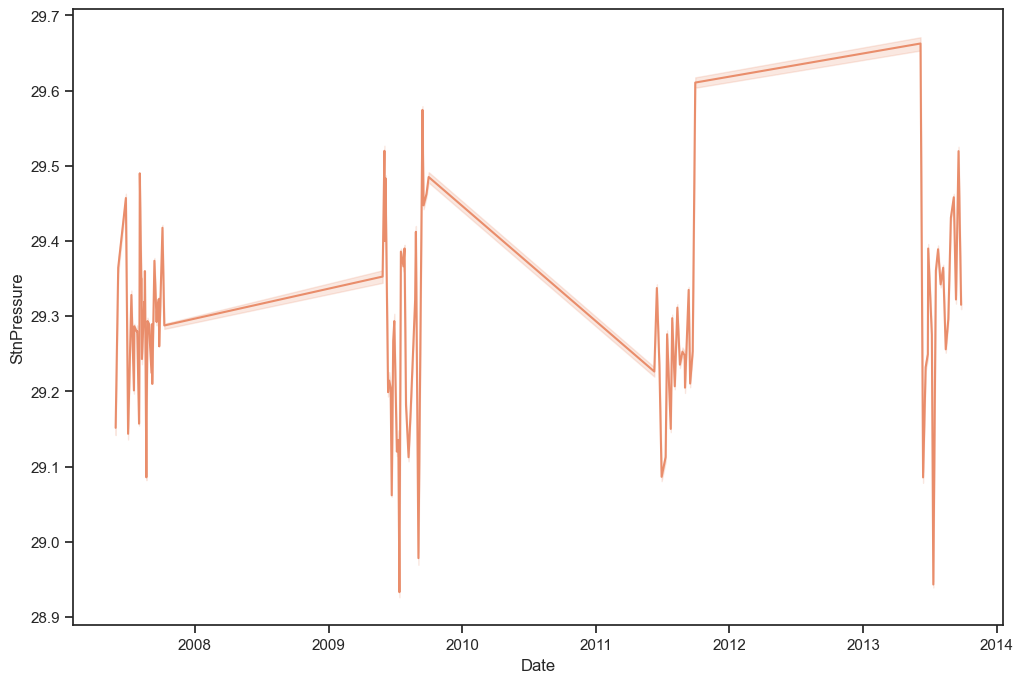

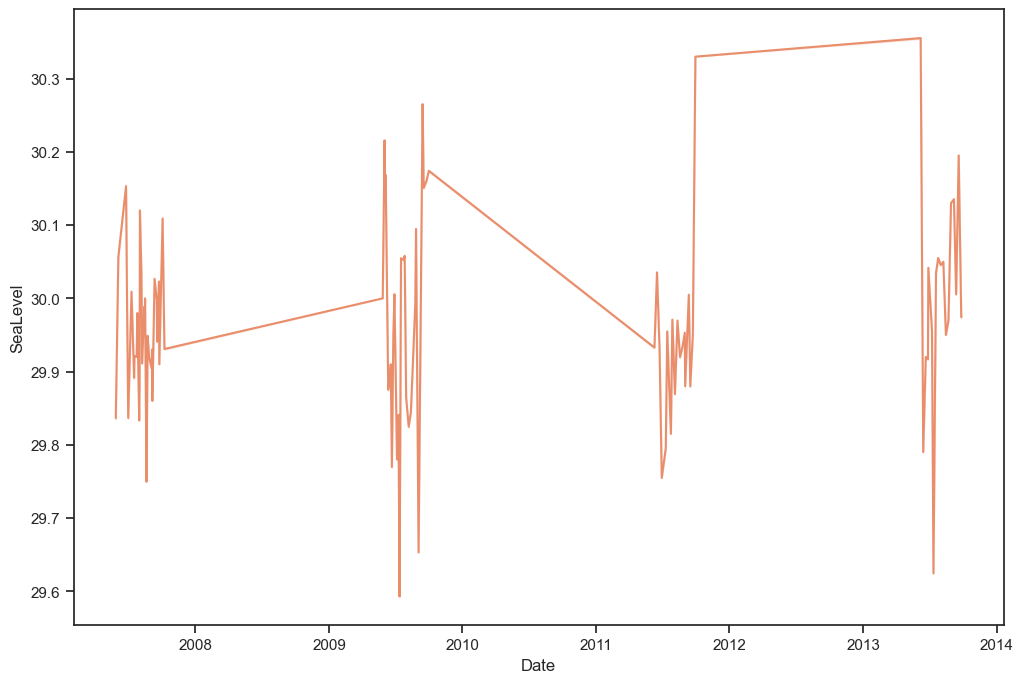

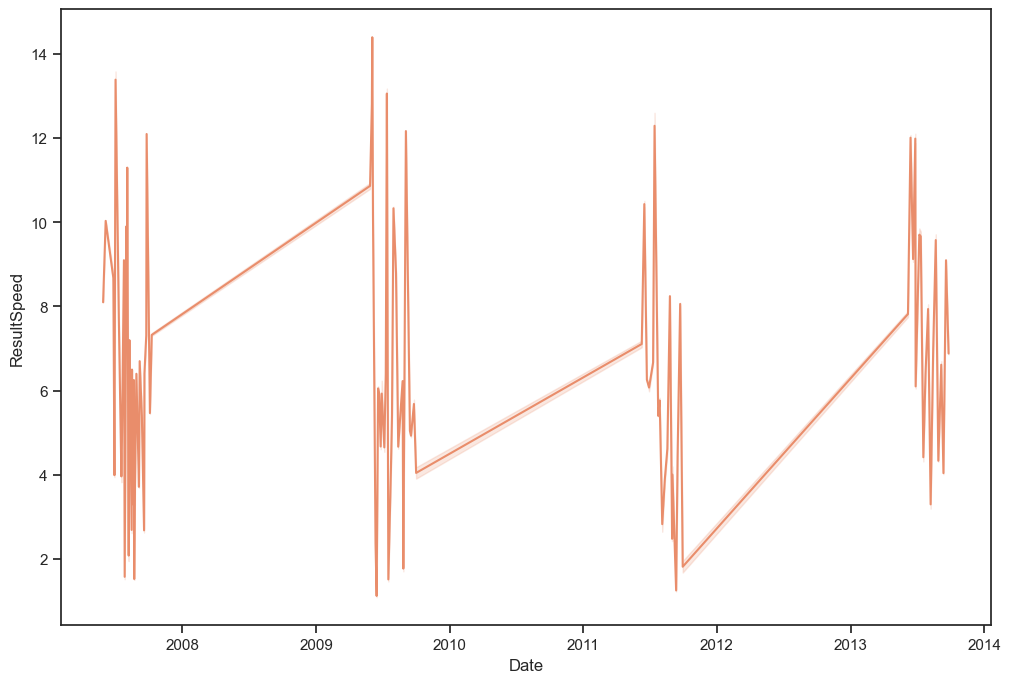

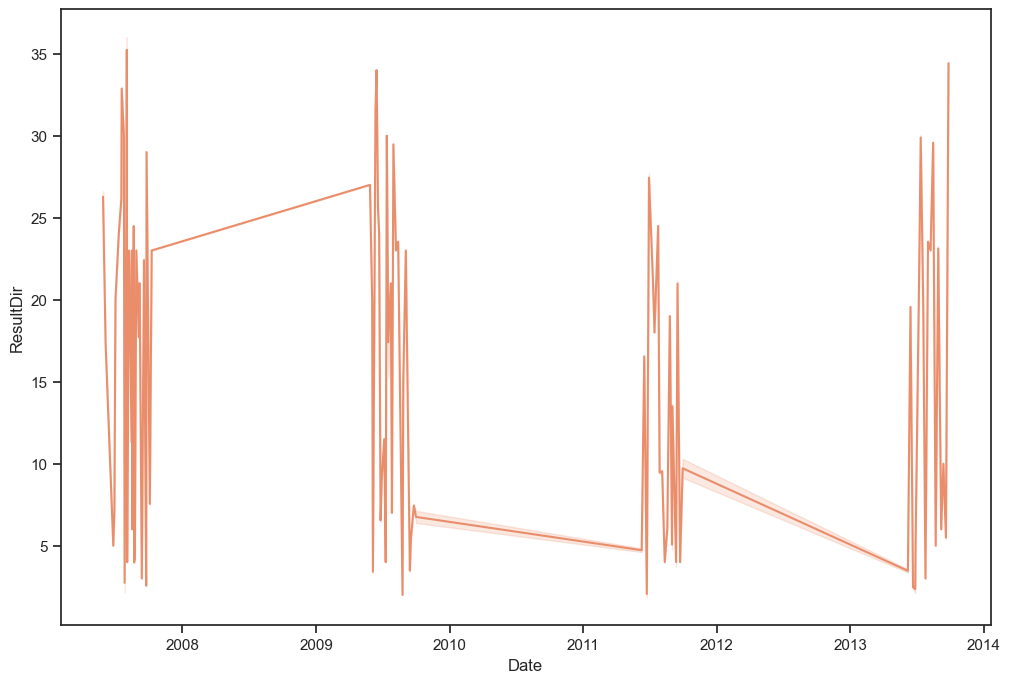

In [ ]:
for i in df_merged.iloc[:,range(6,30)].columns:
    plt.figure(figsize=(12,8))
    sns.lineplot(data=df_merged, x=df_merged["Date"], y=df_merged[i], palette="rainbow")

In [ ]:
# drop snowfall since the period has no snow
df_merged.drop("SnowFall",axis = 1, inplace = True)

In [ ]:
df_merged = df_merged.reset_index()

### Heatplot Map

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   index              10506 non-null  int64          
 1   Date               10506 non-null  datetime64[ns] 
 2   Species            10506 non-null  object         
 3   Trap               10506 non-null  object         
 4   Latitude           10506 non-null  float64        
 5   Longitude          10506 non-null  float64        
 6   AddressAccuracy    10506 non-null  int64          
 7   NumMosquitos       10506 non-null  int64          
 8   WnvPresent         10506 non-null  int64          
 9   Year               10506 non-null  int64          
 10  Month              10506 non-null  int64          
 11  Week               10506 non-null  int64          
 12  DayOfWeek          10506 non-null  int64          
 13  Station            10506 non-null  float64    

<AxesSubplot: >

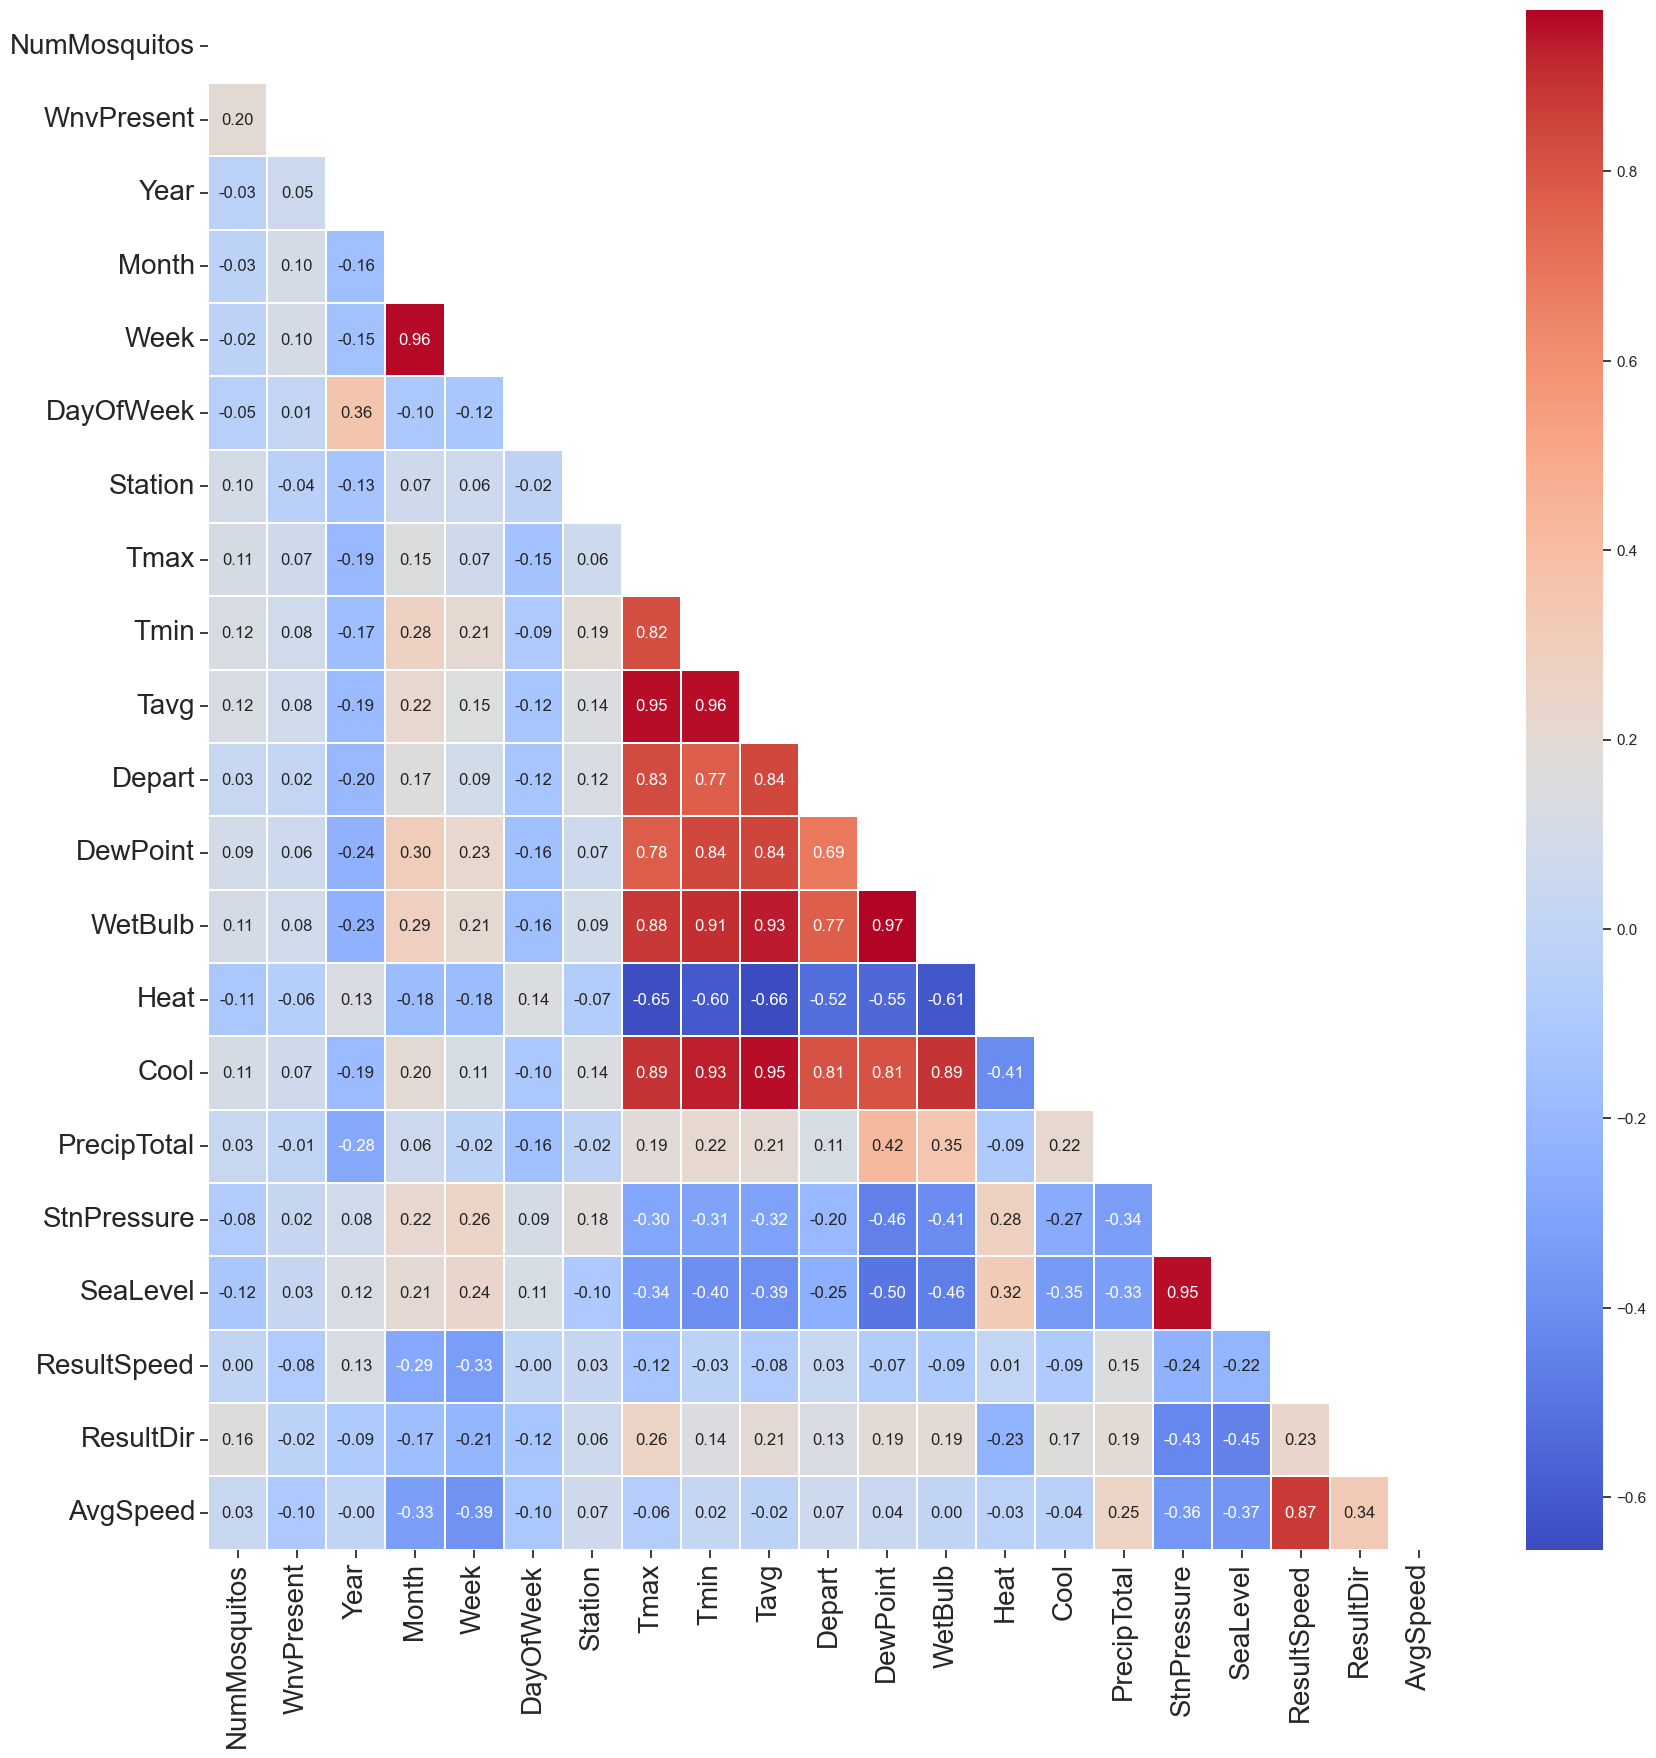

In [ ]:
#heatmap for non-object features
mask = np.zeros_like(df_merged.iloc[:,range(7,31)].corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
sns.heatmap(
    df_merged.iloc[:,range(7,31)].corr(),
    cmap='coolwarm',
    annot=True,
    fmt = ".2f",
    mask = mask,
    linewidth = 0.3)

Drop features with high colinearity >0.85
- ResultSpeed (AvgSpeed)
- StnPressure (SeaLevel)
- Tmin, Tmax, DewPoint, WetBulb, Cool, (Tavg)

In [ ]:
# drop features with high colinearity, and drop sunrise, sunset.
df_merged_final = df_merged.drop(["index","ResultSpeed","StnPressure","Tmin", "Tmax", "DewPoint", "WetBulb", "Cool", "Sunrise", "Sunset"],axis = 1)

In [ ]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Date               10506 non-null  datetime64[ns] 
 1   Species            10506 non-null  object         
 2   Trap               10506 non-null  object         
 3   Latitude           10506 non-null  float64        
 4   Longitude          10506 non-null  float64        
 5   AddressAccuracy    10506 non-null  int64          
 6   NumMosquitos       10506 non-null  int64          
 7   WnvPresent         10506 non-null  int64          
 8   Year               10506 non-null  int64          
 9   Month              10506 non-null  int64          
 10  Week               10506 non-null  int64          
 11  DayOfWeek          10506 non-null  int64          
 12  Station            10506 non-null  float64        
 13  Tavg               10506 non-null  float64    

In [ ]:
# Export dataset
df_merged_final.to_csv('../assets/df_merge_final.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8103834c-d9e3-438c-981d-c55551eaafe0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>